In [91]:
import array_to_latex
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
from openeye import oemolprop
import pandas
from scipy.stats import spearmanr
import seaborn as sns
import warnings
from SI_tools import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(bind) values for each position

In [2]:
total_compounds = pd.read_csv('../data_preparation/output/total_compounds.csv')
display(total_compounds.head(5))

,structure,read_count,bb1,bb2,bb3,bb1_iso,bb2_iso,bb3_iso
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(c(c(c1F)CN)F)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
1,CN(Cc1cc(-c2ccc(Cl)cc2)no1)C(=O)CCn1ccc(C(=O)N...,162,NCC1=CC(C2=CC=C(Cl)C=C2)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(ccc1c2cc(on2)CN)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
2,CC(C)c1nc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc3...,149,CC(C)C1=NC(CN)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)c1nc(no1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
3,CN(Cc1cccc(C(F)(F)F)c1)C(=O)CCn1ccc(C(=O)NCCC(...,326,NCC1=CC(C(F)(F)F)=CC=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(cc(c1)C(F)(F)F)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
4,CC(C)Cc1cc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc...,329,CC(C)CC1=NOC(CN)=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)Cc1cc(on1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2


In [3]:
bb1_list = pd.read_csv('../data_preparation/output/bb1_list.csv')
bb2_list = pd.read_csv('../data_preparation/output/bb2_list.csv')
bb3_list = pd.read_csv('../data_preparation/output/bb3_list.csv')

In [6]:
bb1_pbind = calc_pbind(total_compounds, bb1_list, 'bb1')
bb2_pbind = calc_pbind(total_compounds, bb2_list, 'bb2')
bb3_pbind = calc_pbind(total_compounds, bb3_list, 'bb3')

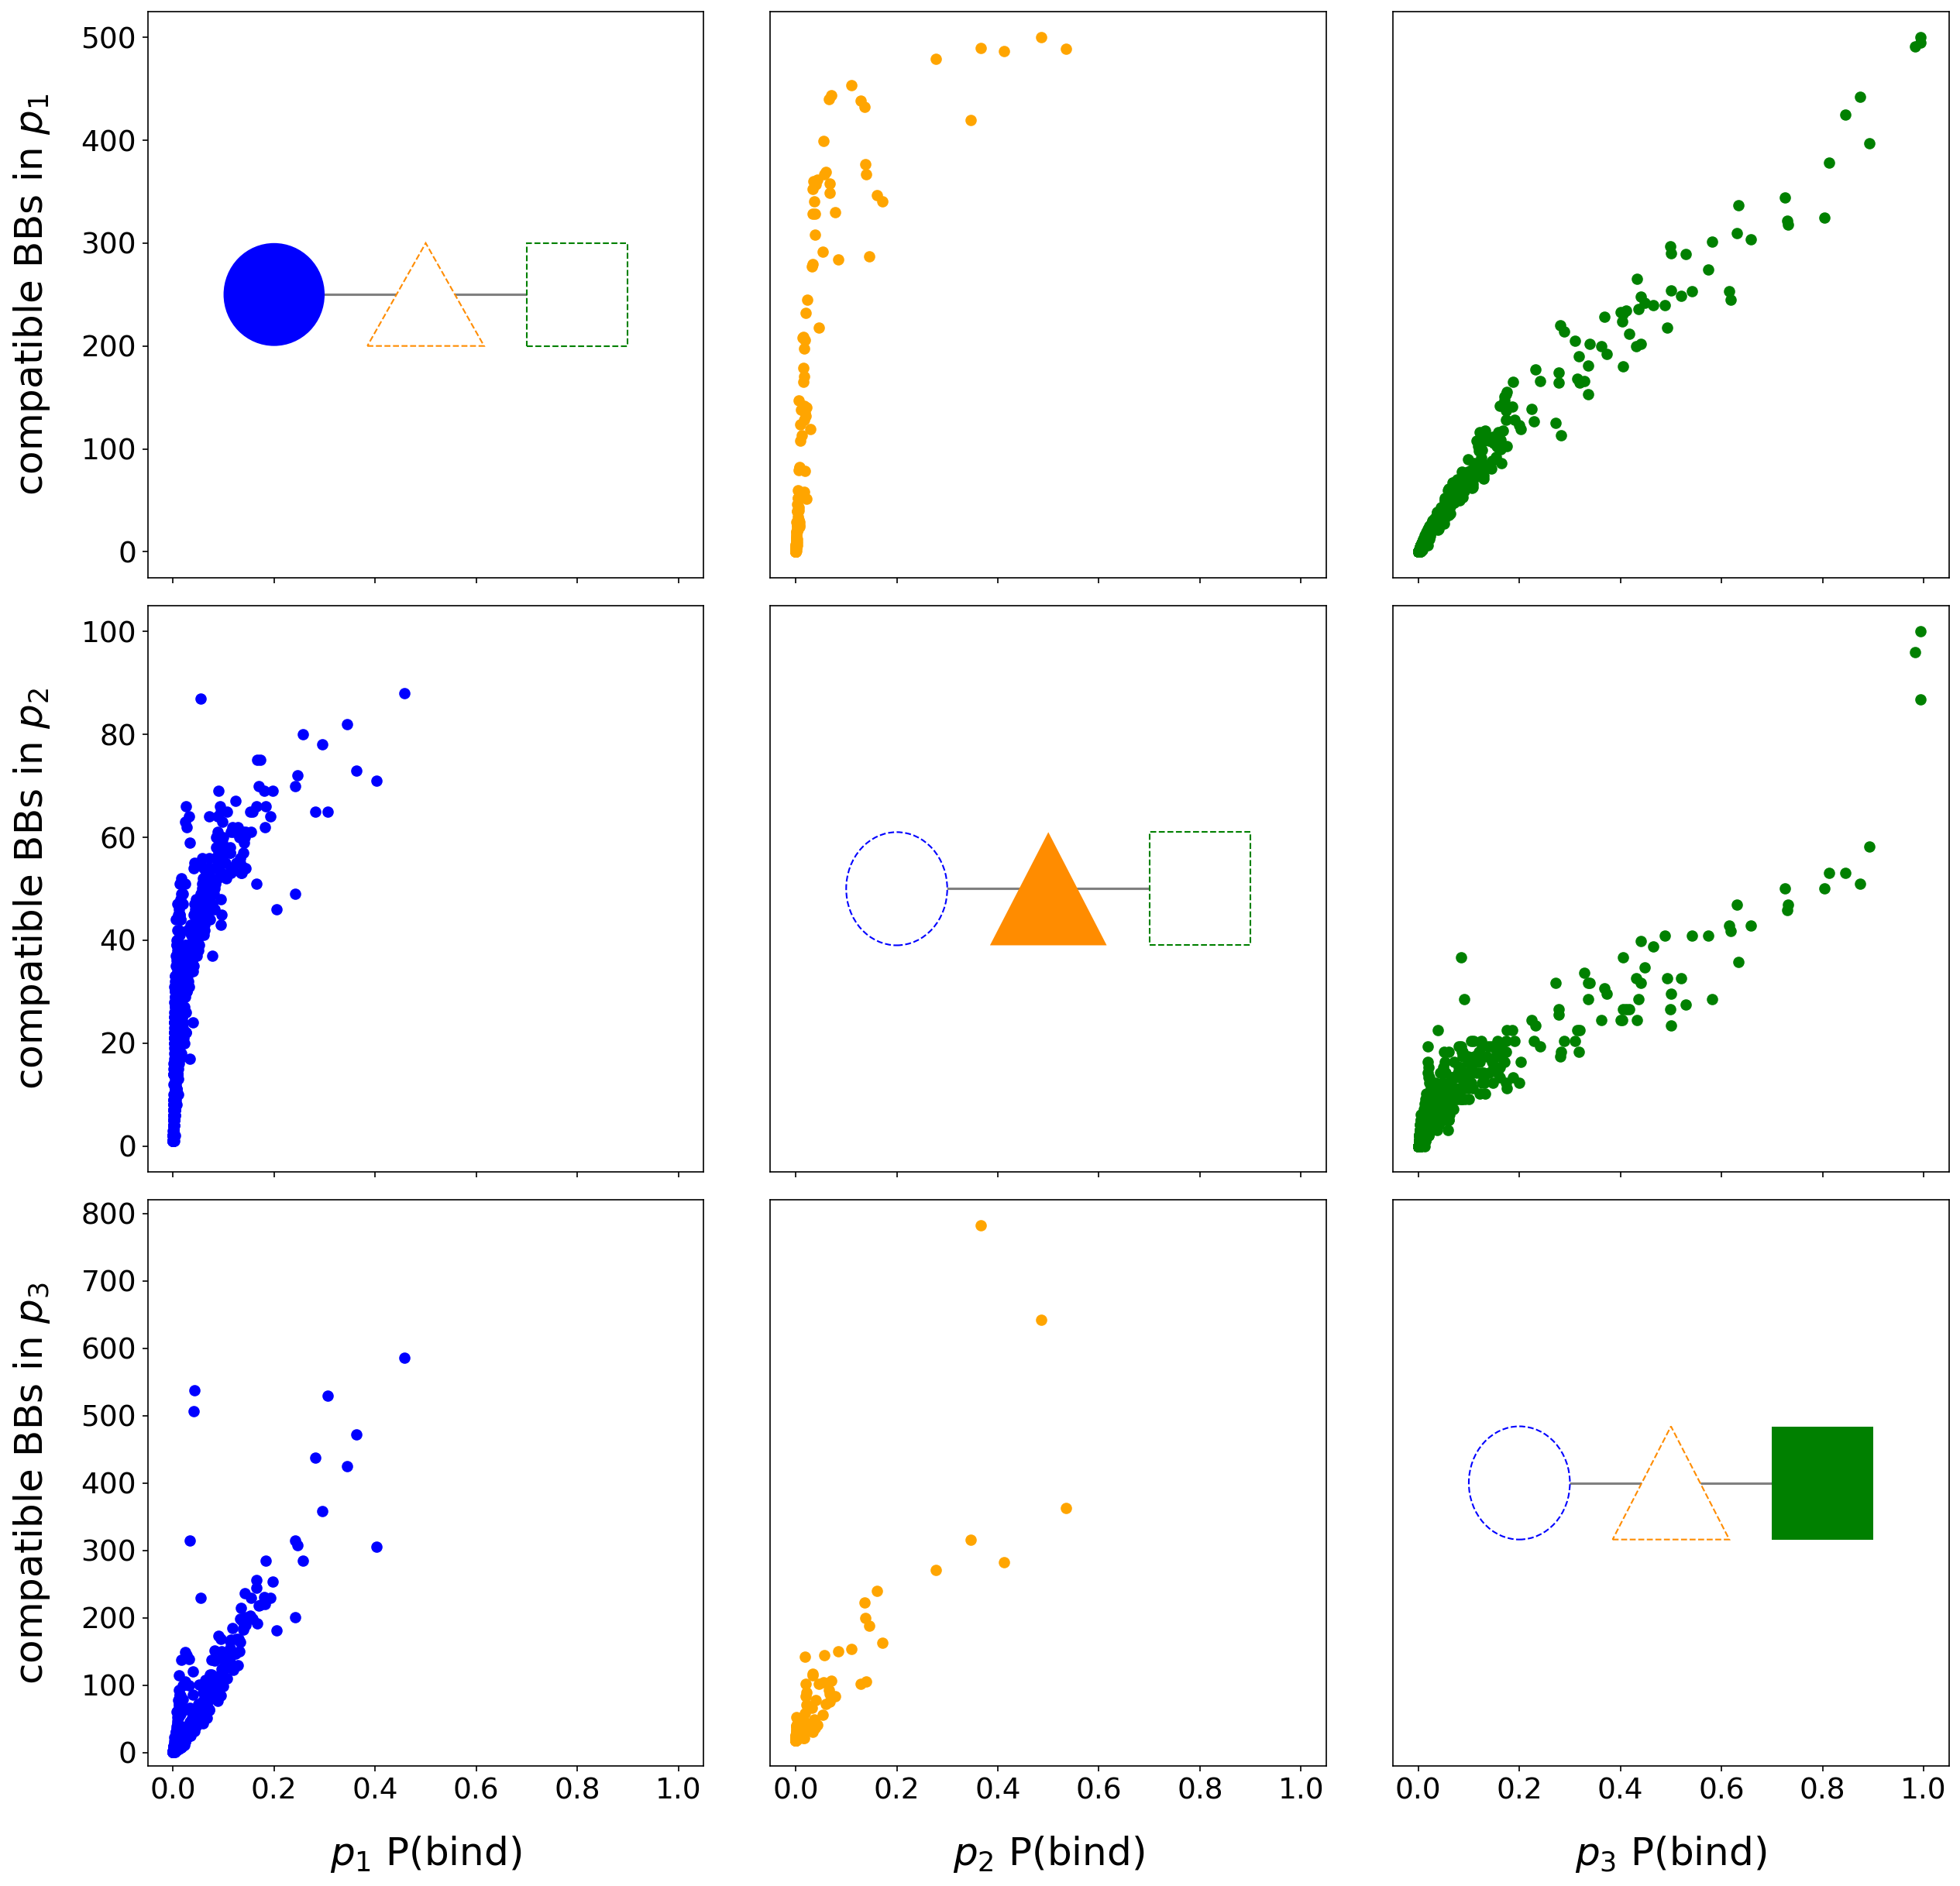

In [7]:
total_merged = merge_df(total_compounds, bb1_pbind, bb2_pbind, bb3_pbind)
binders = get_binders(total_merged)
D_12, D_13, D_21, D_23, D_31, D_32 = plot_compatible(binders)

In [8]:
# Correlation values going rowwise
val = np.zeros((3,3))
val[0][1] = spearmanr(D_21['P(bind)_2'], D_21['bb1'])[0]
val[0][2] = spearmanr(D_31['P(bind)_3'], D_31['bb1'])[0]
val[1][0] = spearmanr(D_12['P(bind)_1'], D_12['bb2'])[0]
val[1][2] = spearmanr(D_32['P(bind)_3'], D_32['bb2'])[0]
val[2][0] = spearmanr(D_13['P(bind)_1'], D_13['bb3'])[0]
val[2][1] = spearmanr(D_23['P(bind)_2'], D_23['bb3'])[0]
array_to_latex.to_ltx(val, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  0.0000 &  0.9732 &  0.9859\\
  0.9075 &  0.0000 &  0.9380\\
  0.9053 &  0.9018 &  0.0000
\end{tabular}


### View 2D bins

In [9]:
all_bins = np.arange(0, 1.2, 0.2)
bb1_pbind = apply_bins(bb1_pbind, bb_pos='bb1', all_bins=all_bins)
bb2_pbind = apply_bins(bb2_pbind, bb_pos='bb2', all_bins=all_bins)
bb3_pbind = apply_bins(bb3_pbind, bb_pos='bb3', all_bins=all_bins)

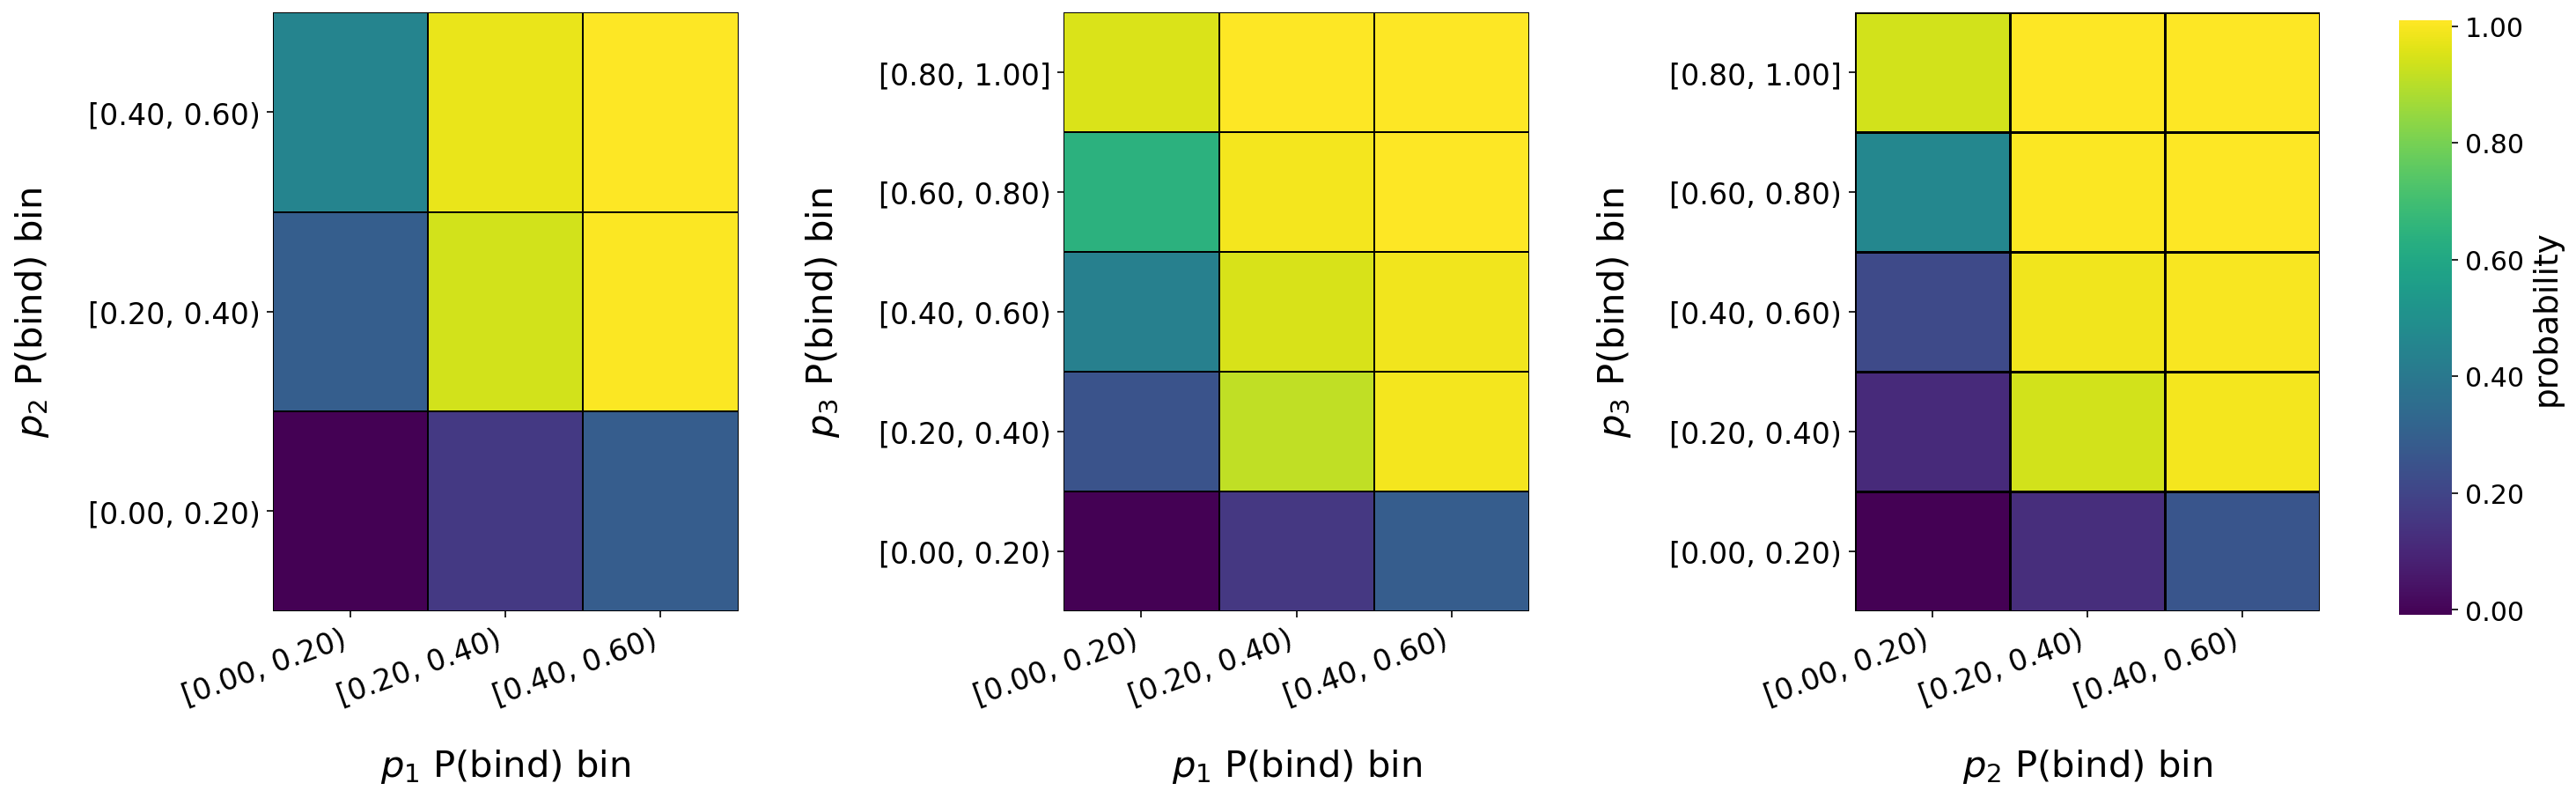

In [10]:
total_bins = merge_df(total_compounds, bb1_pbind, bb2_pbind, bb3_pbind)
bins_1_2, bins_1_3, bins_2_3 = plot_2D_bins(total_bins, bb1_pbind, bb2_pbind, bb3_pbind, all_bins)

In [11]:
#array_to_latex.to_ltx(bins_1_2, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bins_1_3, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bins_2_3, frmt='{:.4f}', arraytype='tabular')

### Import similarity matrix

In [12]:
bb1_fps = [gen_morgan(smi) for smi in bb1_list['iso_SMILES']]
bb2_fps = [gen_morgan(smi) for smi in bb2_list['iso_SMILES']]
bb3_fps = [gen_morgan(smi) for smi in bb3_list['iso_SMILES']]

bb1_sim_2D = tanimoto_matrix(bb1_fps, bb1_fps)
bb2_sim_2D = tanimoto_matrix(bb2_fps, bb2_fps)
bb3_sim_2D = tanimoto_matrix(bb3_fps, bb3_fps)

bb1_dist_2D = dist_mat(bb1_sim_2D)
bb2_dist_2D = dist_mat(bb2_sim_2D)
bb3_dist_2D = dist_mat(bb3_sim_2D)

In [13]:
bb1_sim_3D = np.load('../similarity_calculation/output/bb1_list.npy')
bb2_sim_3D = np.load('../similarity_calculation/output/bb2_list.npy')
bb3_sim_3D = np.load('../similarity_calculation/output/bb3_list.npy')

bb1_dist_3D = dist_mat(bb1_sim_3D)
bb2_dist_3D = dist_mat(bb2_sim_3D)
bb3_dist_3D = dist_mat(bb3_sim_3D)

### Map coordinates with UMAP using 2D Tanimoto

In [44]:
trans_bb1_2D = umap_transform(bb1_dist_2D)
trans_bb2_2D = umap_transform(bb2_dist_2D)
trans_bb3_2D = umap_transform(bb3_dist_2D)

,Position,top - top dist,top - rand dist
0,1,1.777165,4.086515
1,2,3.795657,4.824961
2,3,5.365798,5.100538


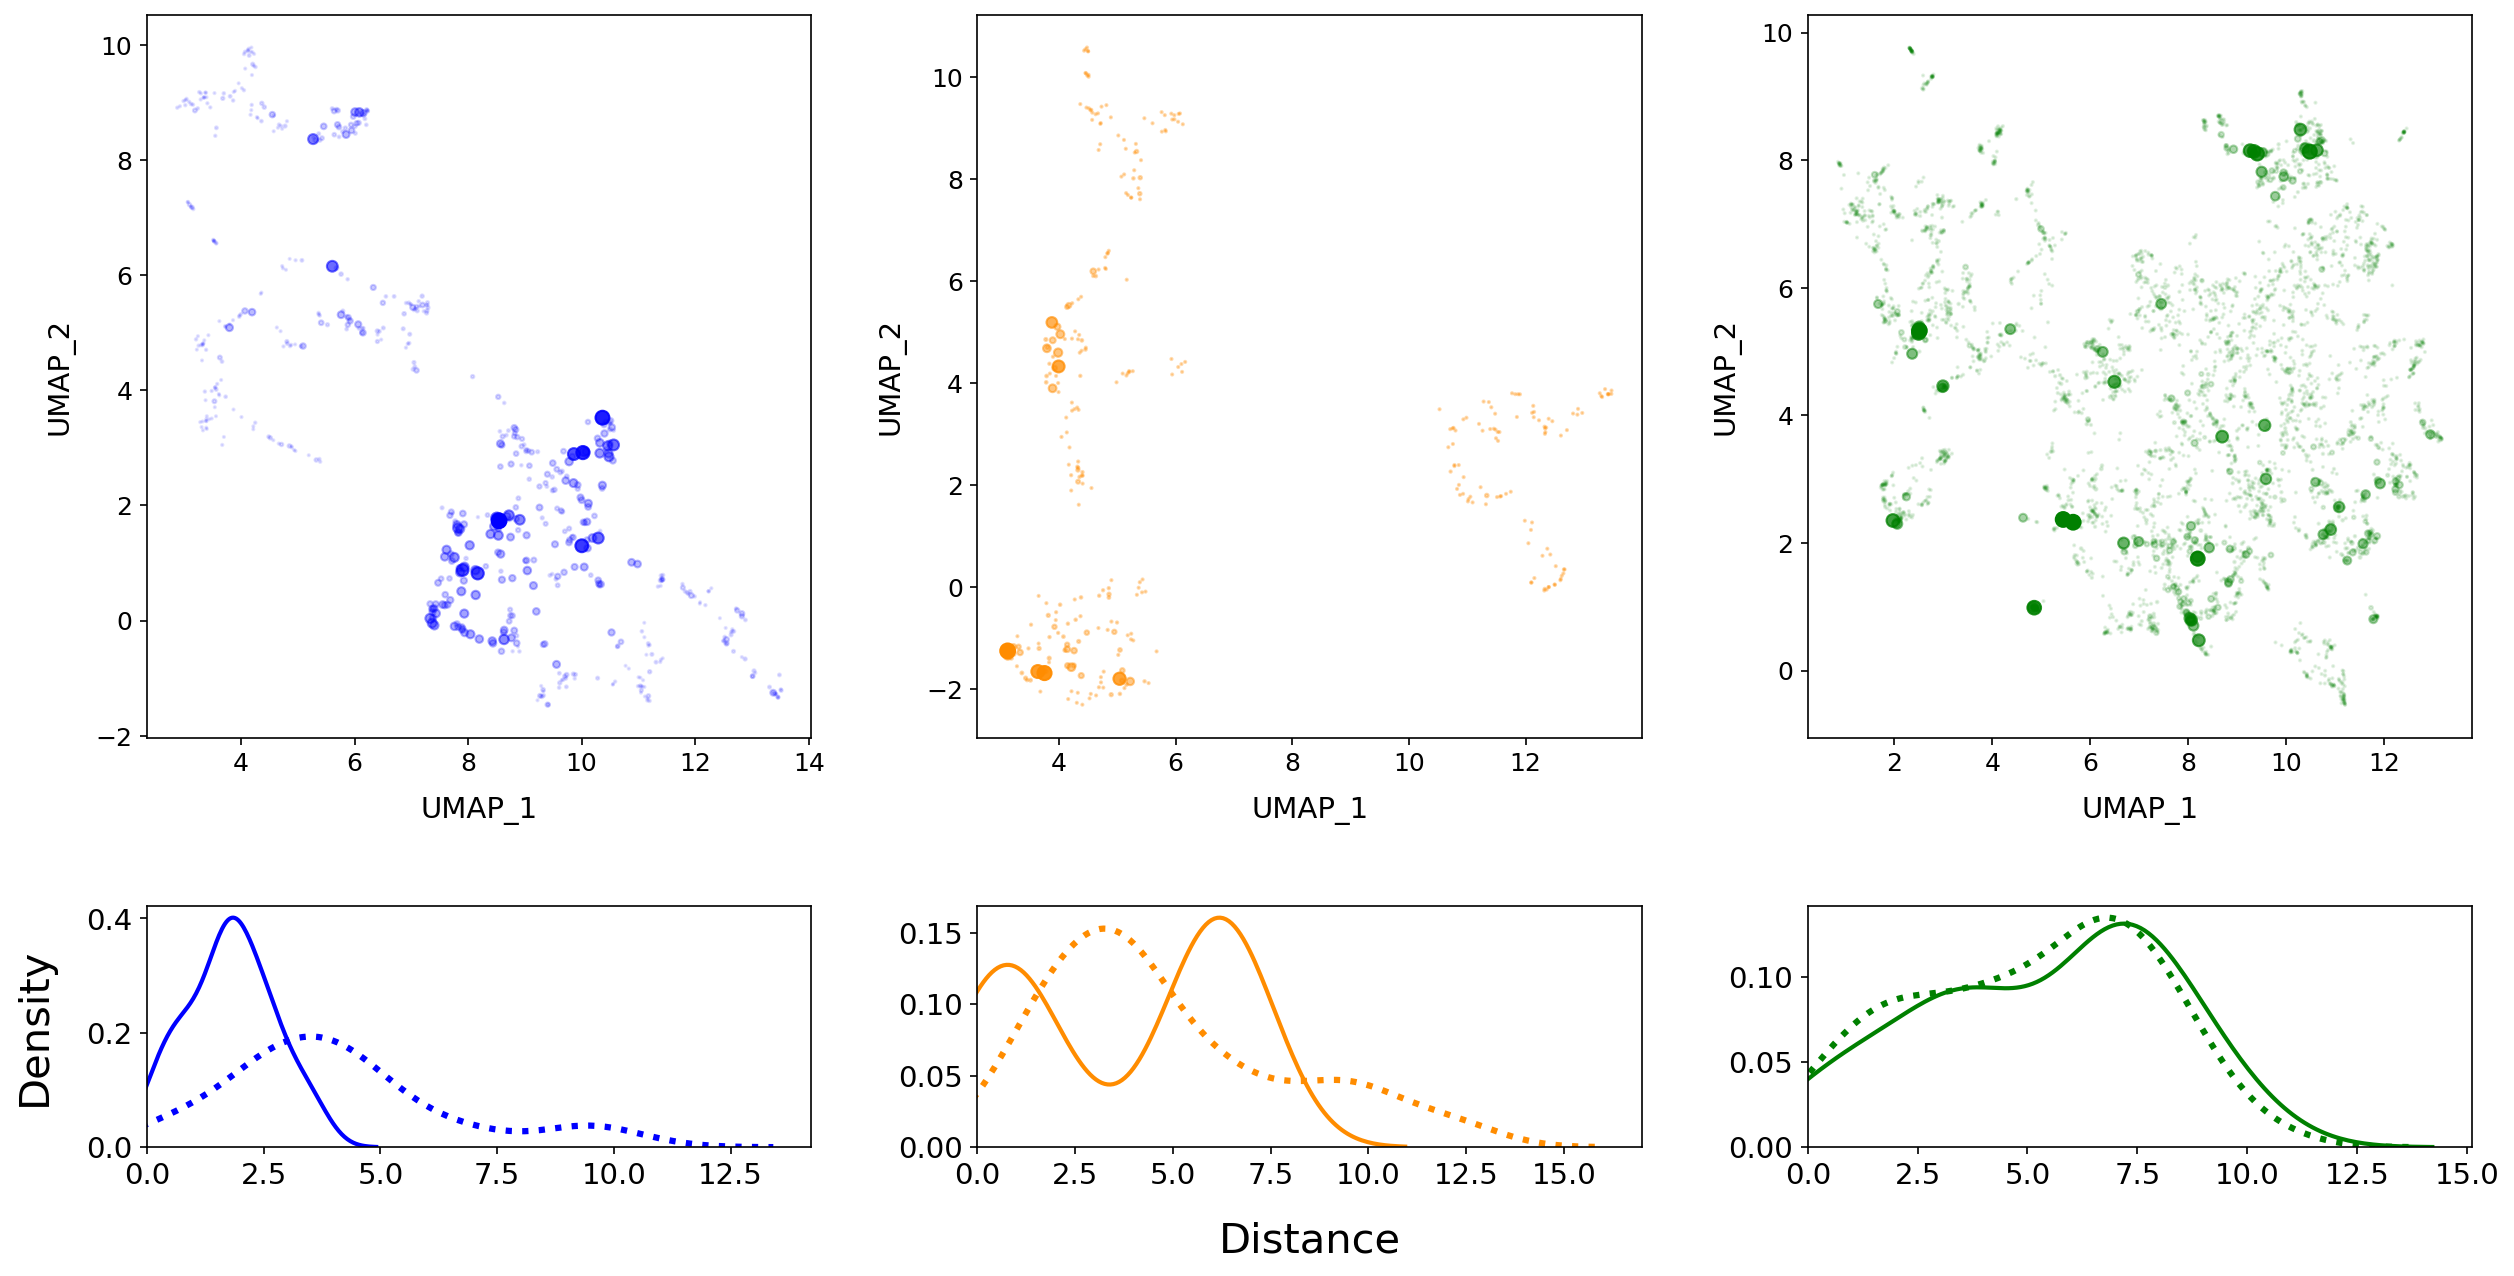

In [45]:
trans_bb1 = trans_bb1_2D
trans_bb2 = trans_bb2_2D
trans_bb3 = trans_bb3_2D


bb1_size = [normalize_range(0, np.max(bb1_pbind['P(bind)']), 1, 50, x) for x in bb1_pbind['P(bind)']]
bb2_size = [normalize_range(0, np.max(bb2_pbind['P(bind)']), 1, 50, x) for x in bb2_pbind['P(bind)']]
bb3_size = [normalize_range(0, np.max(bb3_pbind['P(bind)']), 1, 50, x) for x in bb3_pbind['P(bind)']]

# Adjust marker transparency based on P(bind) value
bb1_alpha = [normalize_range(0, np.max(bb1_pbind['P(bind)']), 0.1, 1, x) for x in bb1_pbind['P(bind)']]
bb2_alpha = [normalize_range(0, np.max(bb2_pbind['P(bind)']), 0.3, 1, x) for x in bb2_pbind['P(bind)']]
bb3_alpha = [normalize_range(0, np.max(bb3_pbind['P(bind)']), 0.1, 1, x) for x in bb3_pbind['P(bind)']]

bb1_colors = [[0.0, 0.0, 1, x] for x in bb1_alpha]
bb2_colors = [[1.0, 0.549, 0, x] for x in bb2_alpha]
bb3_colors = [[0.0, 0.50196, 0, x] for x in bb3_alpha]

fig, axs = plt.subplots(2, 3, dpi=150, figsize=(20,10), 
                        gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.25, hspace=0.35)

# Assign X and Y coordinates for each point from UMAP
bb1_pbind[['X','Y']] = trans_bb1.embedding_
bb2_pbind[['X','Y']] = trans_bb2.embedding_
bb3_pbind[['X','Y']] = trans_bb3.embedding_

# Plot each building block in position 1 in UMAP space scaled by its P(bind) value 
axs[0][0].scatter(bb1_pbind['X'], bb1_pbind['Y'], s=bb1_size, color=bb1_colors)
axs[0][0].set_xlabel('UMAP_1', fontsize=14, labelpad=10)
axs[0][0].set_ylabel('UMAP_2', fontsize=14, labelpad=10)
axs[0][0].tick_params(axis='both', labelsize=12)

# Plot each building block in position 2 in UMAP space scaled by its P(bind) value 
axs[0][1].scatter(bb2_pbind['X'], bb2_pbind['Y'], s=bb2_size, color=bb2_colors)
axs[0][1].set_xlabel('UMAP_1', fontsize=14, labelpad=10)
axs[0][1].set_ylabel('UMAP_2', fontsize=14, labelpad=10)
axs[0][1].tick_params(axis='both', labelsize=12)

# Plot each building block in position 3 in UMAP space scaled by its P(bind) value 
axs[0][2].scatter(bb3_pbind['X'], bb3_pbind['Y'], s=bb3_size, color=bb3_colors)
axs[0][2].set_xlabel('UMAP_1', fontsize=14, labelpad=10)
axs[0][2].set_ylabel('UMAP_2', fontsize=14, labelpad=10)
axs[0][2].tick_params(axis='both', labelsize=12)

# Calculate distances between points in UMAP space
bb1_dist_mat = distance_matrix(trans_bb1.embedding_, trans_bb1.embedding_)
bb2_dist_mat = distance_matrix(trans_bb2.embedding_, trans_bb2.embedding_)
bb3_dist_mat = distance_matrix(trans_bb3.embedding_, trans_bb3.embedding_)

# Get distance between top P(bind) and randomly selected building blocks in position 1
top_ind = bb1_pbind.sort_values(by='P(bind)', ascending=False).head(10).index
rand_ind = bb1_pbind.sample(n=10, random_state=42).index
bb1_top = bb1_dist_mat[top_ind, :][:, top_ind]
bb1_rand = bb1_dist_mat[rand_ind, :][:, rand_ind]
bb1_top_rand = bb1_dist_mat[top_ind, :][:, rand_ind]

# Get distance between top P(bind) and randomly selected building blocks in position 2
top_ind = bb2_pbind.sort_values(by='P(bind)', ascending=False).head(10).index
rand_ind = bb2_pbind.sample(n=10, random_state=42).index
bb2_top = bb2_dist_mat[top_ind, :][:, top_ind]
bb2_rand = bb2_dist_mat[rand_ind, :][:, rand_ind]
bb2_top_rand = bb2_dist_mat[top_ind, :][:, rand_ind]

# Get distance between top P(bind) and randomly selected building blocks in position 3
top_ind = bb3_pbind.sort_values(by='P(bind)', ascending=False).head(10).index
rand_ind = bb3_pbind.sample(n=10, random_state=42).index
bb3_top = bb3_dist_mat[top_ind, :][:, top_ind]
bb3_rand = bb3_dist_mat[rand_ind, :][:, rand_ind]
bb3_top_rand = bb3_dist_mat[top_ind, :][:, rand_ind]

# Plot density of distances between top P(bind) building blocks and randomly selected building blocks in position 1
sns.kdeplot(bb1_top[np.triu_indices(10, k=1)], color='blue', ax=axs[1][0], linewidth=2)
sns.kdeplot(bb1_top_rand.ravel(), color='blue', linestyle='dotted', ax=axs[1][0], linewidth=3)
axs[1][0].set_xlim(left=0)
axs[1][0].tick_params(axis='both', which='major', labelsize=14)
axs[1][0].set_ylabel('Density', labelpad=15, fontsize=20)

# Plot density of distances between top P(bind) building blocks and randomly selected building blocks in position 2
sns.kdeplot(bb2_top[np.triu_indices(10, k=1)], color='darkorange', ax=axs[1][1], linewidth=2)
sns.kdeplot(bb2_top_rand.ravel(), color='darkorange', linestyle='dotted', ax=axs[1][1], linewidth=3)
axs[1][1].set_xlim(left=0)
axs[1][1].set_ylabel('')
axs[1][1].tick_params(axis='both', which='major', labelsize=14)
axs[1][1].set_xlabel('Distance', labelpad=15, fontsize=20)

# Plot density of distances between top P(bind) building blocks and randomly selected building blocks in position 3
sns.kdeplot(bb3_top[np.triu_indices(10, k=1)], color='green', ax=axs[1][2], linewidth=2)
sns.kdeplot(bb3_top_rand.ravel(), color='green', linestyle='dotted', ax=axs[1][2], linewidth=3)
axs[1][2].set_xlim(left=0)
axs[1][2].set_ylabel('')
axs[1][2].tick_params(axis='both', which='major', labelsize=14)

df = pd.DataFrame([[1, np.mean(bb1_top[np.triu_indices(10, k=1)]), np.mean(bb1_top_rand.ravel())],
          [2, np.mean(bb2_top[np.triu_indices(10, k=1)]), np.mean(bb2_top_rand.ravel())],
          [3, np.mean(bb3_top[np.triu_indices(10, k=1)]), np.mean(bb3_top_rand.ravel())]], 
          columns=['Position', 'top - top dist', 'top - rand dist'])

display(df)

#fig.savefig('SI_figure_4.png')

In [46]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

### Map coordinates with UMAP using 3D Tanimoto

,Position,top - top dist,top - rand dist
0,1,3.487797,6.007284
1,2,1.209196,4.787256
2,3,4.603769,8.225290


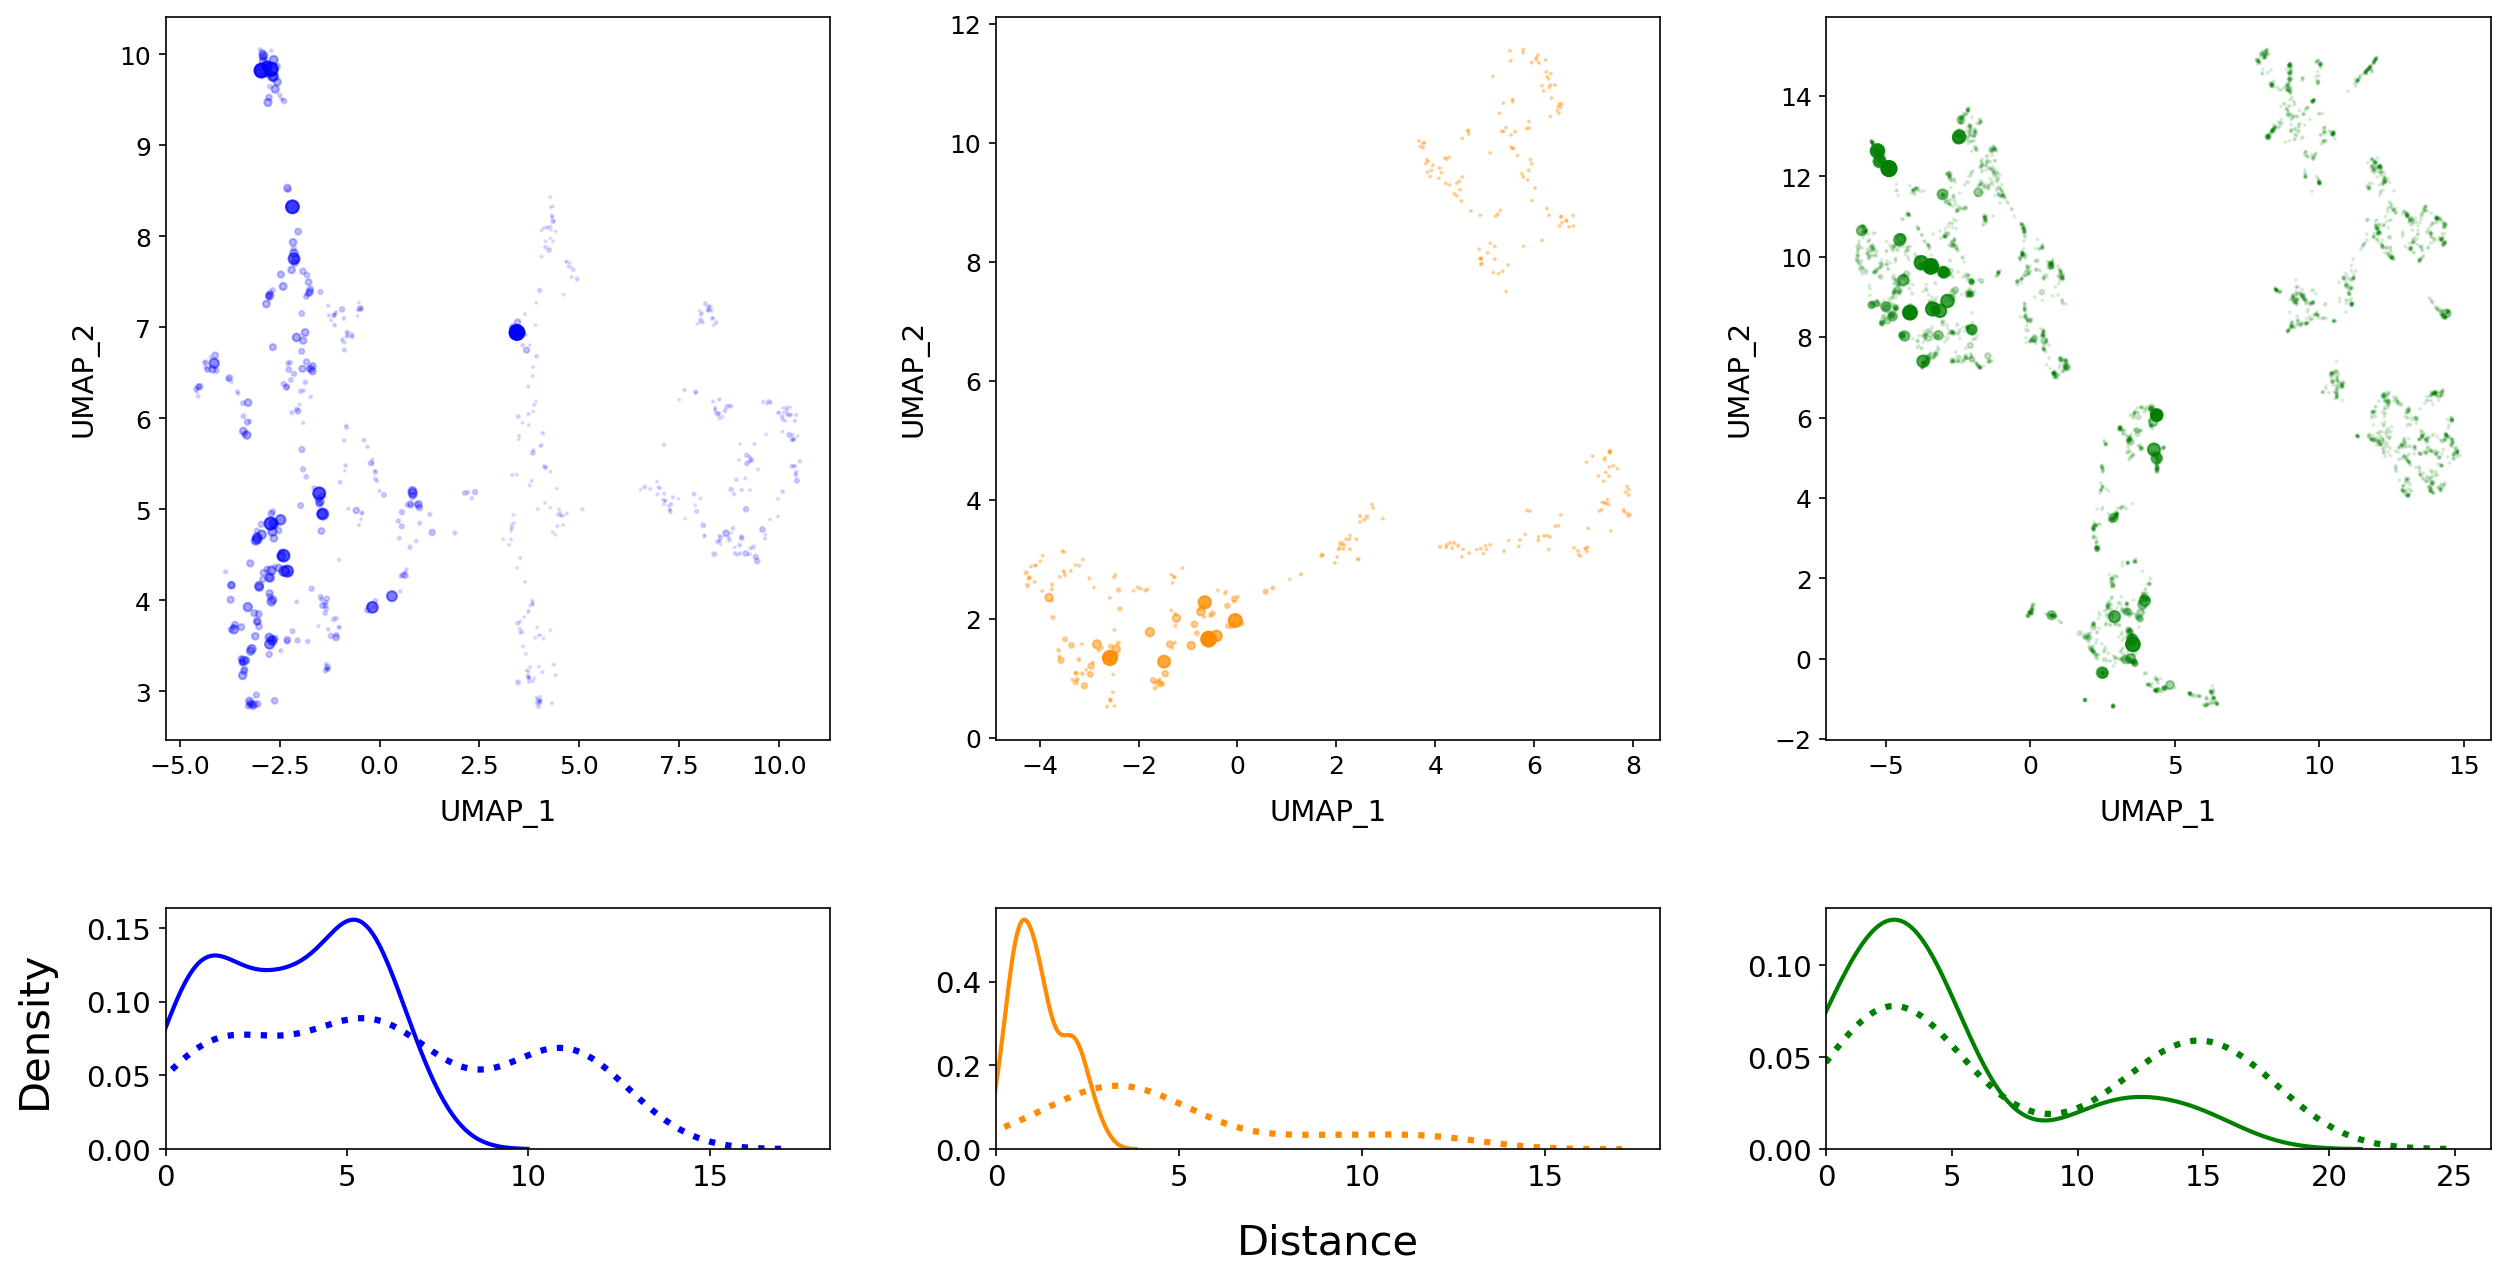

In [47]:
bb1_pbind, bb2_pbind, bb3_pbind = plot_umap(bb1_pbind, bb2_pbind, bb3_pbind, trans_bb1, trans_bb2, trans_bb3)

### Get Tanimoto and UMAP distance for building blocks in the same P(bind) bin

In [48]:
bb1_dist_bins_2D = get_dist_bins(bb1_pbind, trans_bb1_2D, bb1_dist_2D, bb_pos='bb1')
bb1_dist_bins_3D = get_dist_bins(bb1_pbind, trans_bb1, bb1_dist_3D, bb_pos='bb1')
#array_to_latex.to_ltx(bb1_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb1_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

In [49]:
bb2_dist_bins_2D = get_dist_bins(bb2_pbind, trans_bb2_2D, bb2_dist_2D, bb_pos='bb2')
bb2_dist_bins_3D = get_dist_bins(bb2_pbind, trans_bb2, bb2_dist_3D, bb_pos='bb2')
#array_to_latex.to_ltx(bb2_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb2_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

In [50]:
bb3_dist_bins_2D = get_dist_bins(bb3_pbind, trans_bb3_2D, bb3_dist_2D, bb_pos='bb3')
bb3_dist_bins_3D = get_dist_bins(bb3_pbind, trans_bb3, bb3_dist_3D, bb_pos='bb3')
#array_to_latex.to_ltx(bb3_dist_bins_2D, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(bb3_dist_bins_3D, frmt='{:.4f}', arraytype='tabular')

### Cluster with HDBSCAN

In [51]:
sil_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='silhouette')
ch_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='calinski_harabasz_score')
db_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='davies_bouldin_score')
obj_search_bb1 = hdbscan_param_search(bb1_pbind, trans_bb1)
obj_params_bb1 = optimal_params(obj_search_bb1)

In [52]:
sil_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='silhouette')
ch_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='calinski_harabasz_score')
db_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='davies_bouldin_score')
obj_search_bb2 = hdbscan_param_search(bb2_pbind, trans_bb2)
obj_params_bb2 = optimal_params(obj_search_bb2)

In [53]:
sil_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='silhouette')
ch_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='calinski_harabasz_score')
db_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='davies_bouldin_score')
obj_search_bb3 = hdbscan_param_search(bb3_pbind, trans_bb3)
obj_params_bb3 = optimal_params(obj_search_bb3)

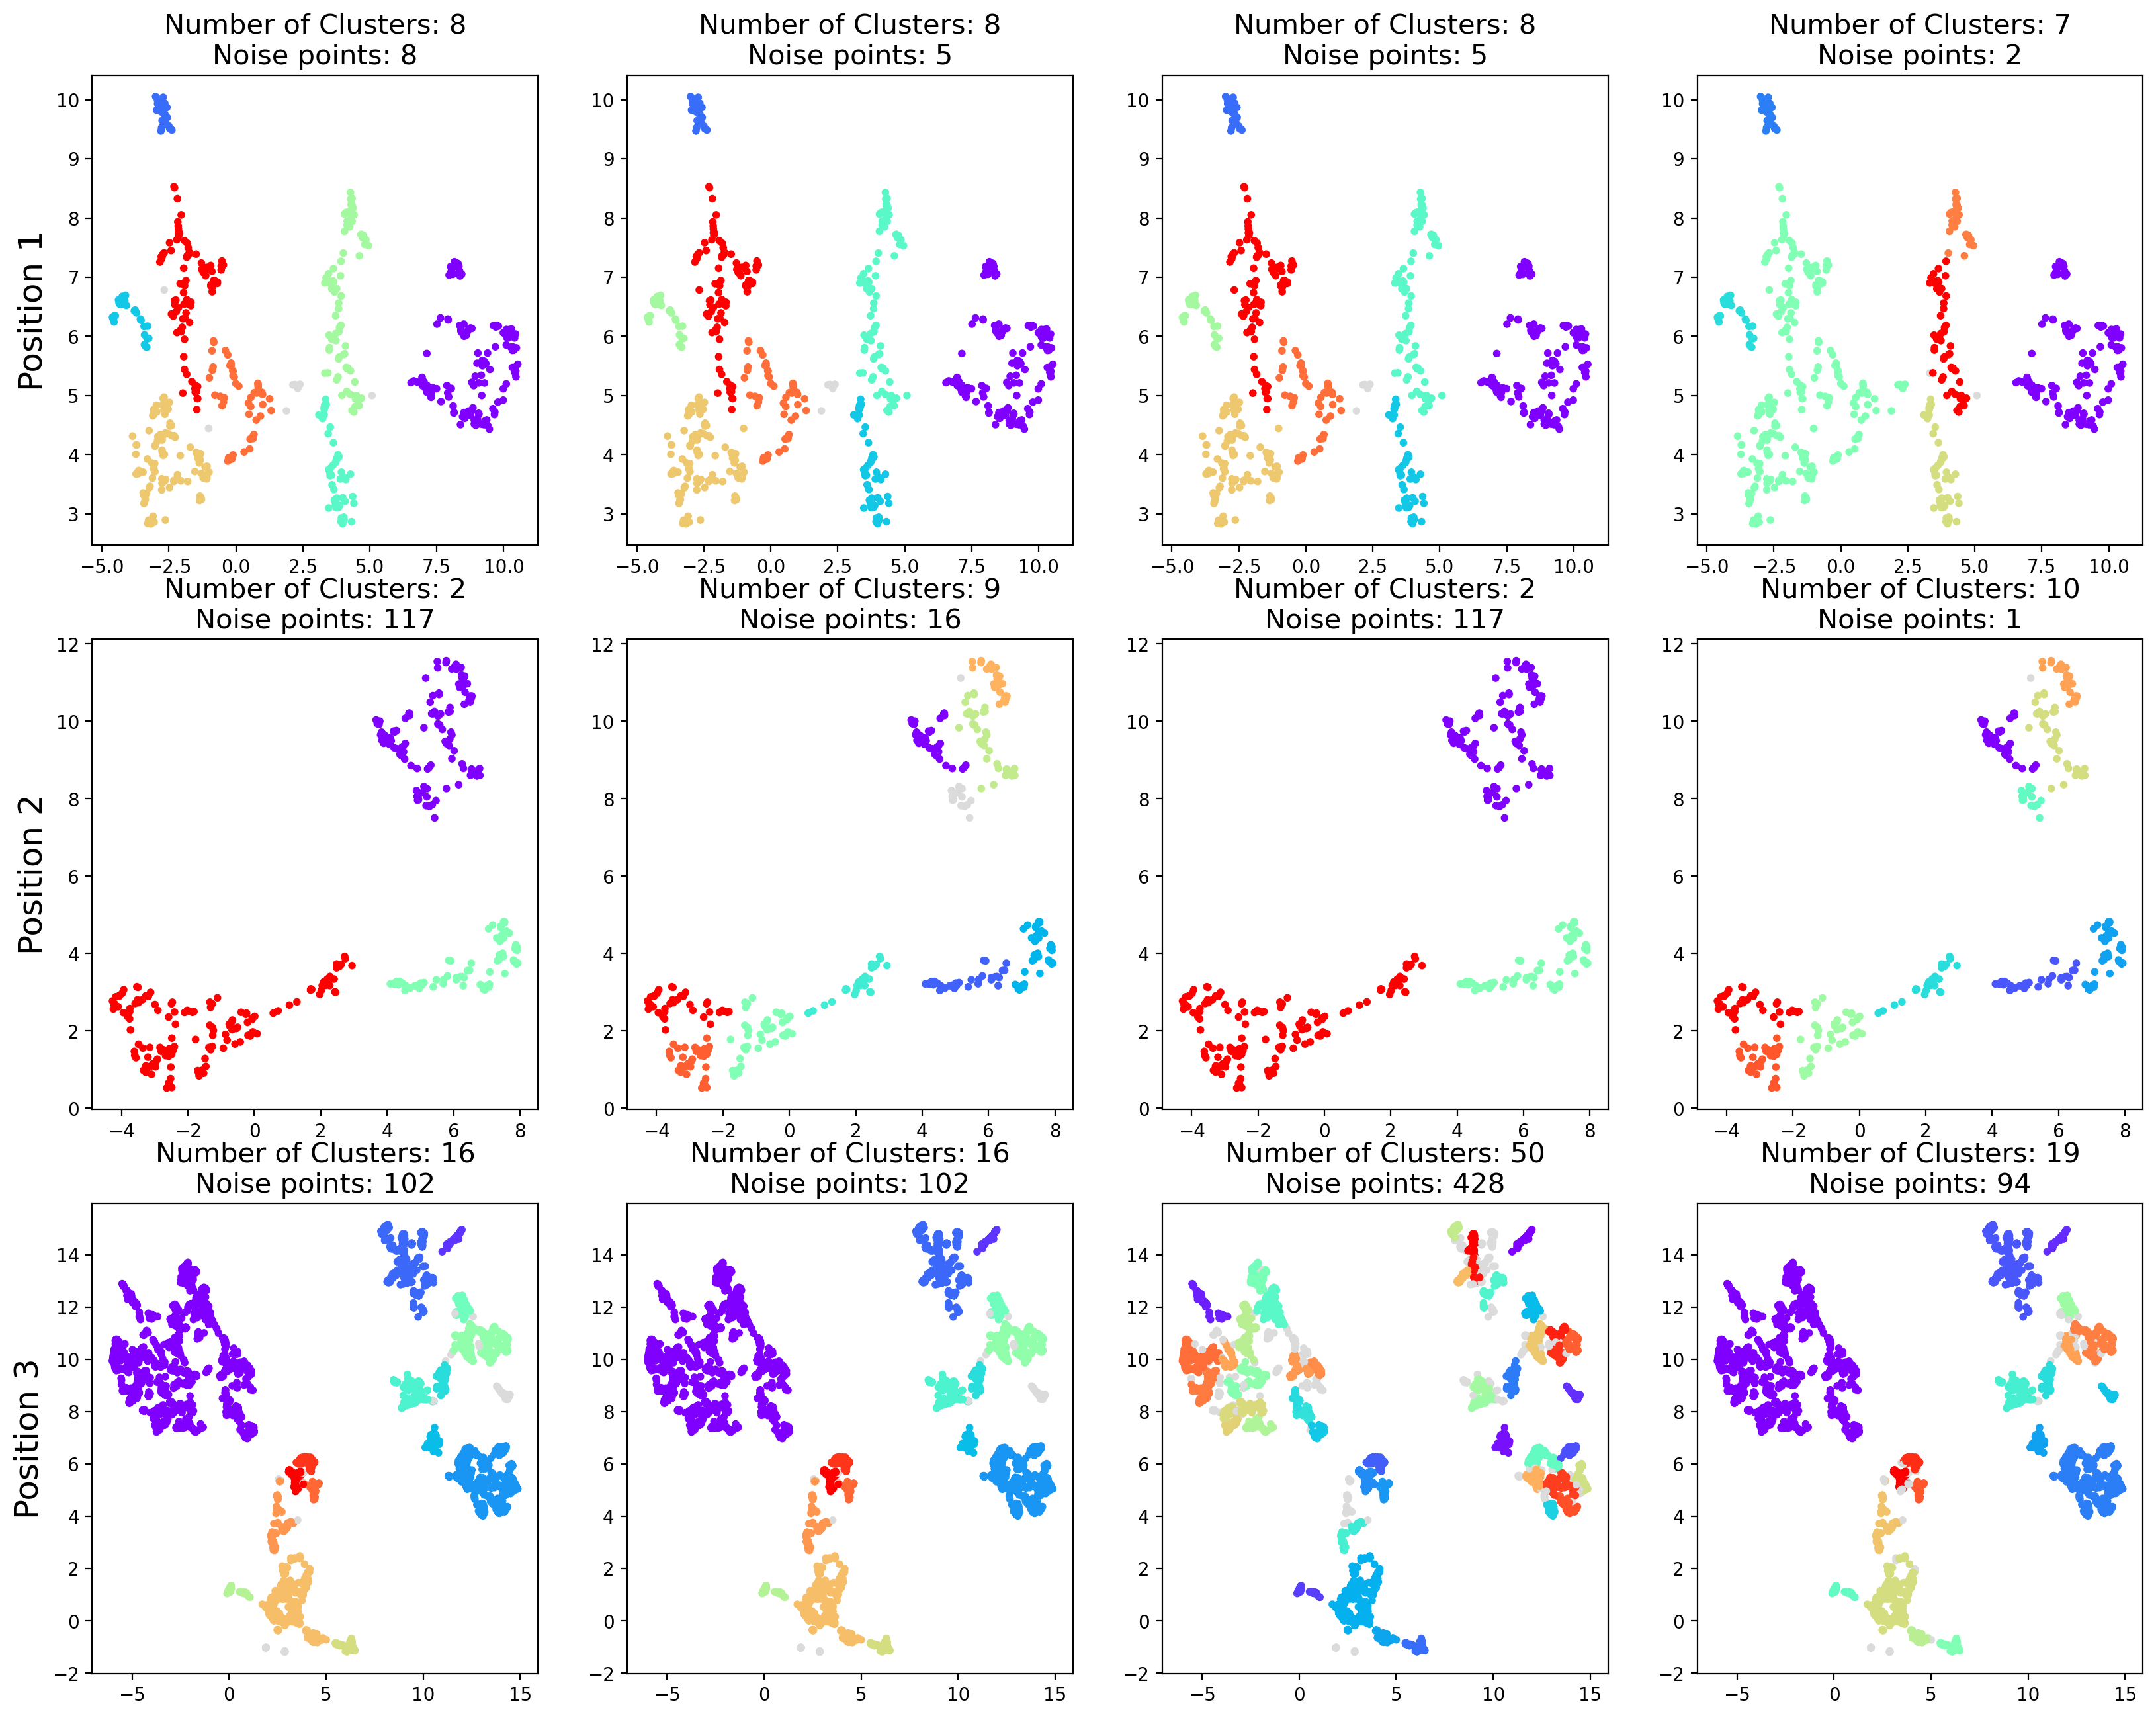

In [54]:
fig, axs = plt.subplots(3,4, figsize=(20,16), dpi=200)
tfs = 15
lfs = 18
sil_bb1 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb1[0], min_samples=sil_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
sil_bb1_colors = set_colors(sil_bb1.labels_)
axs[0][0].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=sil_bb1_colors[sil_bb1.labels_], s=10)
axs[0][0].set_title(f'Number of Clusters: {len(np.unique(sil_bb1.labels_))-1}\nNoise points: {np.unique(sil_bb1.labels_, return_counts=True)[1][0]}', fontsize=tfs)
axs[0][0].set_ylabel('Position 1', fontsize=lfs)

sil_bb2 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb2[0], min_samples=sil_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
sil_bb2_colors = set_colors(sil_bb2.labels_)
axs[1][0].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=sil_bb2_colors[sil_bb2.labels_], s=10)
axs[1][0].set_title(f'Number of Clusters: {len(np.unique(sil_bb2.labels_))-1}\nNoise points: {np.unique(sil_bb2.labels_, return_counts=True)[1][0]}', fontsize=tfs)
axs[1][0].set_ylabel('Position 2', fontsize=lfs)

sil_bb3 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb3[0], min_samples=sil_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
sil_bb3_colors = set_colors(sil_bb3.labels_)
axs[2][0].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=sil_bb3_colors[sil_bb3.labels_], s=10)
axs[2][0].set_title(f'Number of Clusters: {len(np.unique(sil_bb3.labels_))-1}\nNoise points: {np.unique(sil_bb3.labels_, return_counts=True)[1][0]}', fontsize=tfs)
axs[2][0].set_ylabel('Position 3', fontsize=lfs)

ch_bb1 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb1[0], min_samples=ch_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
ch_bb1_colors = set_colors(ch_bb1.labels_)
axs[0][1].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=ch_bb1_colors[ch_bb1.labels_], s=10)
axs[0][1].set_title(f'Number of Clusters: {len(np.unique(ch_bb1.labels_))-1}\nNoise points: {np.unique(ch_bb1.labels_, return_counts=True)[1][0]}', fontsize=tfs)

ch_bb2 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb2[0], min_samples=ch_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
ch_bb2_colors = set_colors(ch_bb2.labels_)
axs[1][1].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=ch_bb2_colors[ch_bb2.labels_], s=10)
axs[1][1].set_title(f'Number of Clusters: {len(np.unique(ch_bb2.labels_))-1}\nNoise points: {np.unique(ch_bb2.labels_, return_counts=True)[1][0]}', fontsize=tfs)

ch_bb3 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb3[0], min_samples=ch_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
ch_bb3_colors = set_colors(ch_bb3.labels_)
axs[2][1].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=ch_bb3_colors[ch_bb3.labels_], s=10)
axs[2][1].set_title(f'Number of Clusters: {len(np.unique(ch_bb3.labels_))-1}\nNoise points: {np.unique(ch_bb3.labels_, return_counts=True)[1][0]}', fontsize=tfs)

db_bb1 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb1[0], min_samples=db_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
db_bb1_colors = set_colors(db_bb1.labels_)
axs[0][2].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=db_bb1_colors[db_bb1.labels_], s=10)
axs[0][2].set_title(f'Number of Clusters: {len(np.unique(db_bb1.labels_))-1}\nNoise points: {np.unique(db_bb1.labels_, return_counts=True)[1][0]}', fontsize=tfs)

db_bb2 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb2[0], min_samples=db_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
db_bb2_colors = set_colors(db_bb2.labels_)
axs[1][2].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=db_bb2_colors[db_bb2.labels_], s=10)
axs[1][2].set_title(f'Number of Clusters: {len(np.unique(db_bb2.labels_))-1}\nNoise points: {np.unique(db_bb2.labels_, return_counts=True)[1][0]}', fontsize=tfs)

db_bb3 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb3[0], min_samples=db_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
db_bb3_colors = set_colors(db_bb3.labels_)
axs[2][2].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=db_bb3_colors[db_bb3.labels_], s=10)
axs[2][2].set_title(f'Number of Clusters: {len(np.unique(db_bb3.labels_))-1}\nNoise points: {np.unique(db_bb3.labels_, return_counts=True)[1][0]}', fontsize=tfs)

obj_bb1 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb1[0], min_samples=obj_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
obj_bb1_colors = set_colors(obj_bb1.labels_)
axs[0][3].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=obj_bb1_colors[obj_bb1.labels_], s=10)
axs[0][3].set_title(f'Number of Clusters: {len(np.unique(obj_bb1.labels_))-1}\nNoise points: {np.unique(obj_bb1.labels_, return_counts=True)[1][0]}', fontsize=tfs)

obj_bb2 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb2[0], min_samples=obj_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
obj_bb2_colors = set_colors(obj_bb2.labels_)
axs[1][3].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=obj_bb2_colors[obj_bb2.labels_], s=10)
axs[1][3].set_title(f'Number of Clusters: {len(np.unique(obj_bb2.labels_))-1}\nNoise points: {np.unique(obj_bb2.labels_, return_counts=True)[1][0]}', fontsize=tfs)

obj_bb3 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb3[0], min_samples=obj_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
obj_bb3_colors = set_colors(obj_bb3.labels_)
axs[2][3].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=obj_bb3_colors[obj_bb3.labels_], s=10)
axs[2][3].set_title(f'Number of Clusters: {len(np.unique(obj_bb3.labels_))-1}\nNoise points: {np.unique(obj_bb3.labels_, return_counts=True)[1][0]}', fontsize=tfs)
plt.show()

#fig.savefig('SI_fig_9.png')

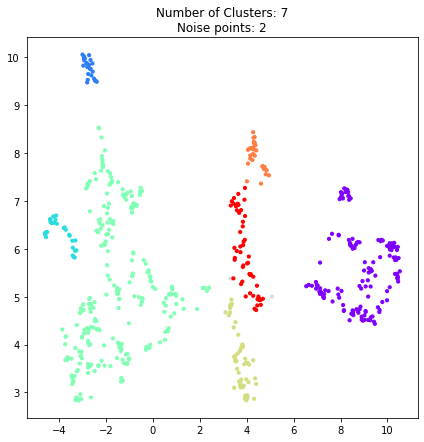

In [55]:
bb1_pbind = plot_hdbscan(bb1_pbind, obj_params_bb1, trans_bb1)

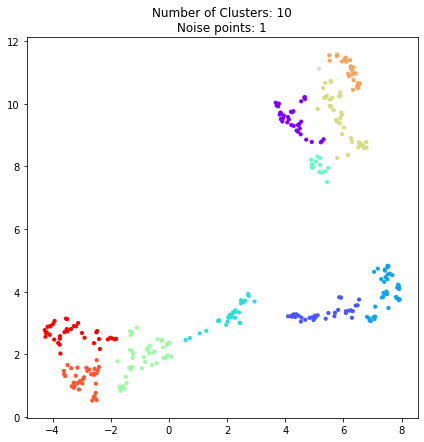

In [56]:
bb2_pbind = plot_hdbscan(bb2_pbind, obj_params_bb2, trans_bb2)

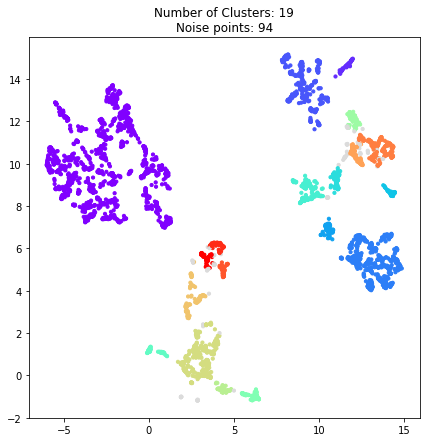

In [57]:
bb3_pbind = plot_hdbscan(bb3_pbind, obj_params_bb3, trans_bb3)

### Plot objective function

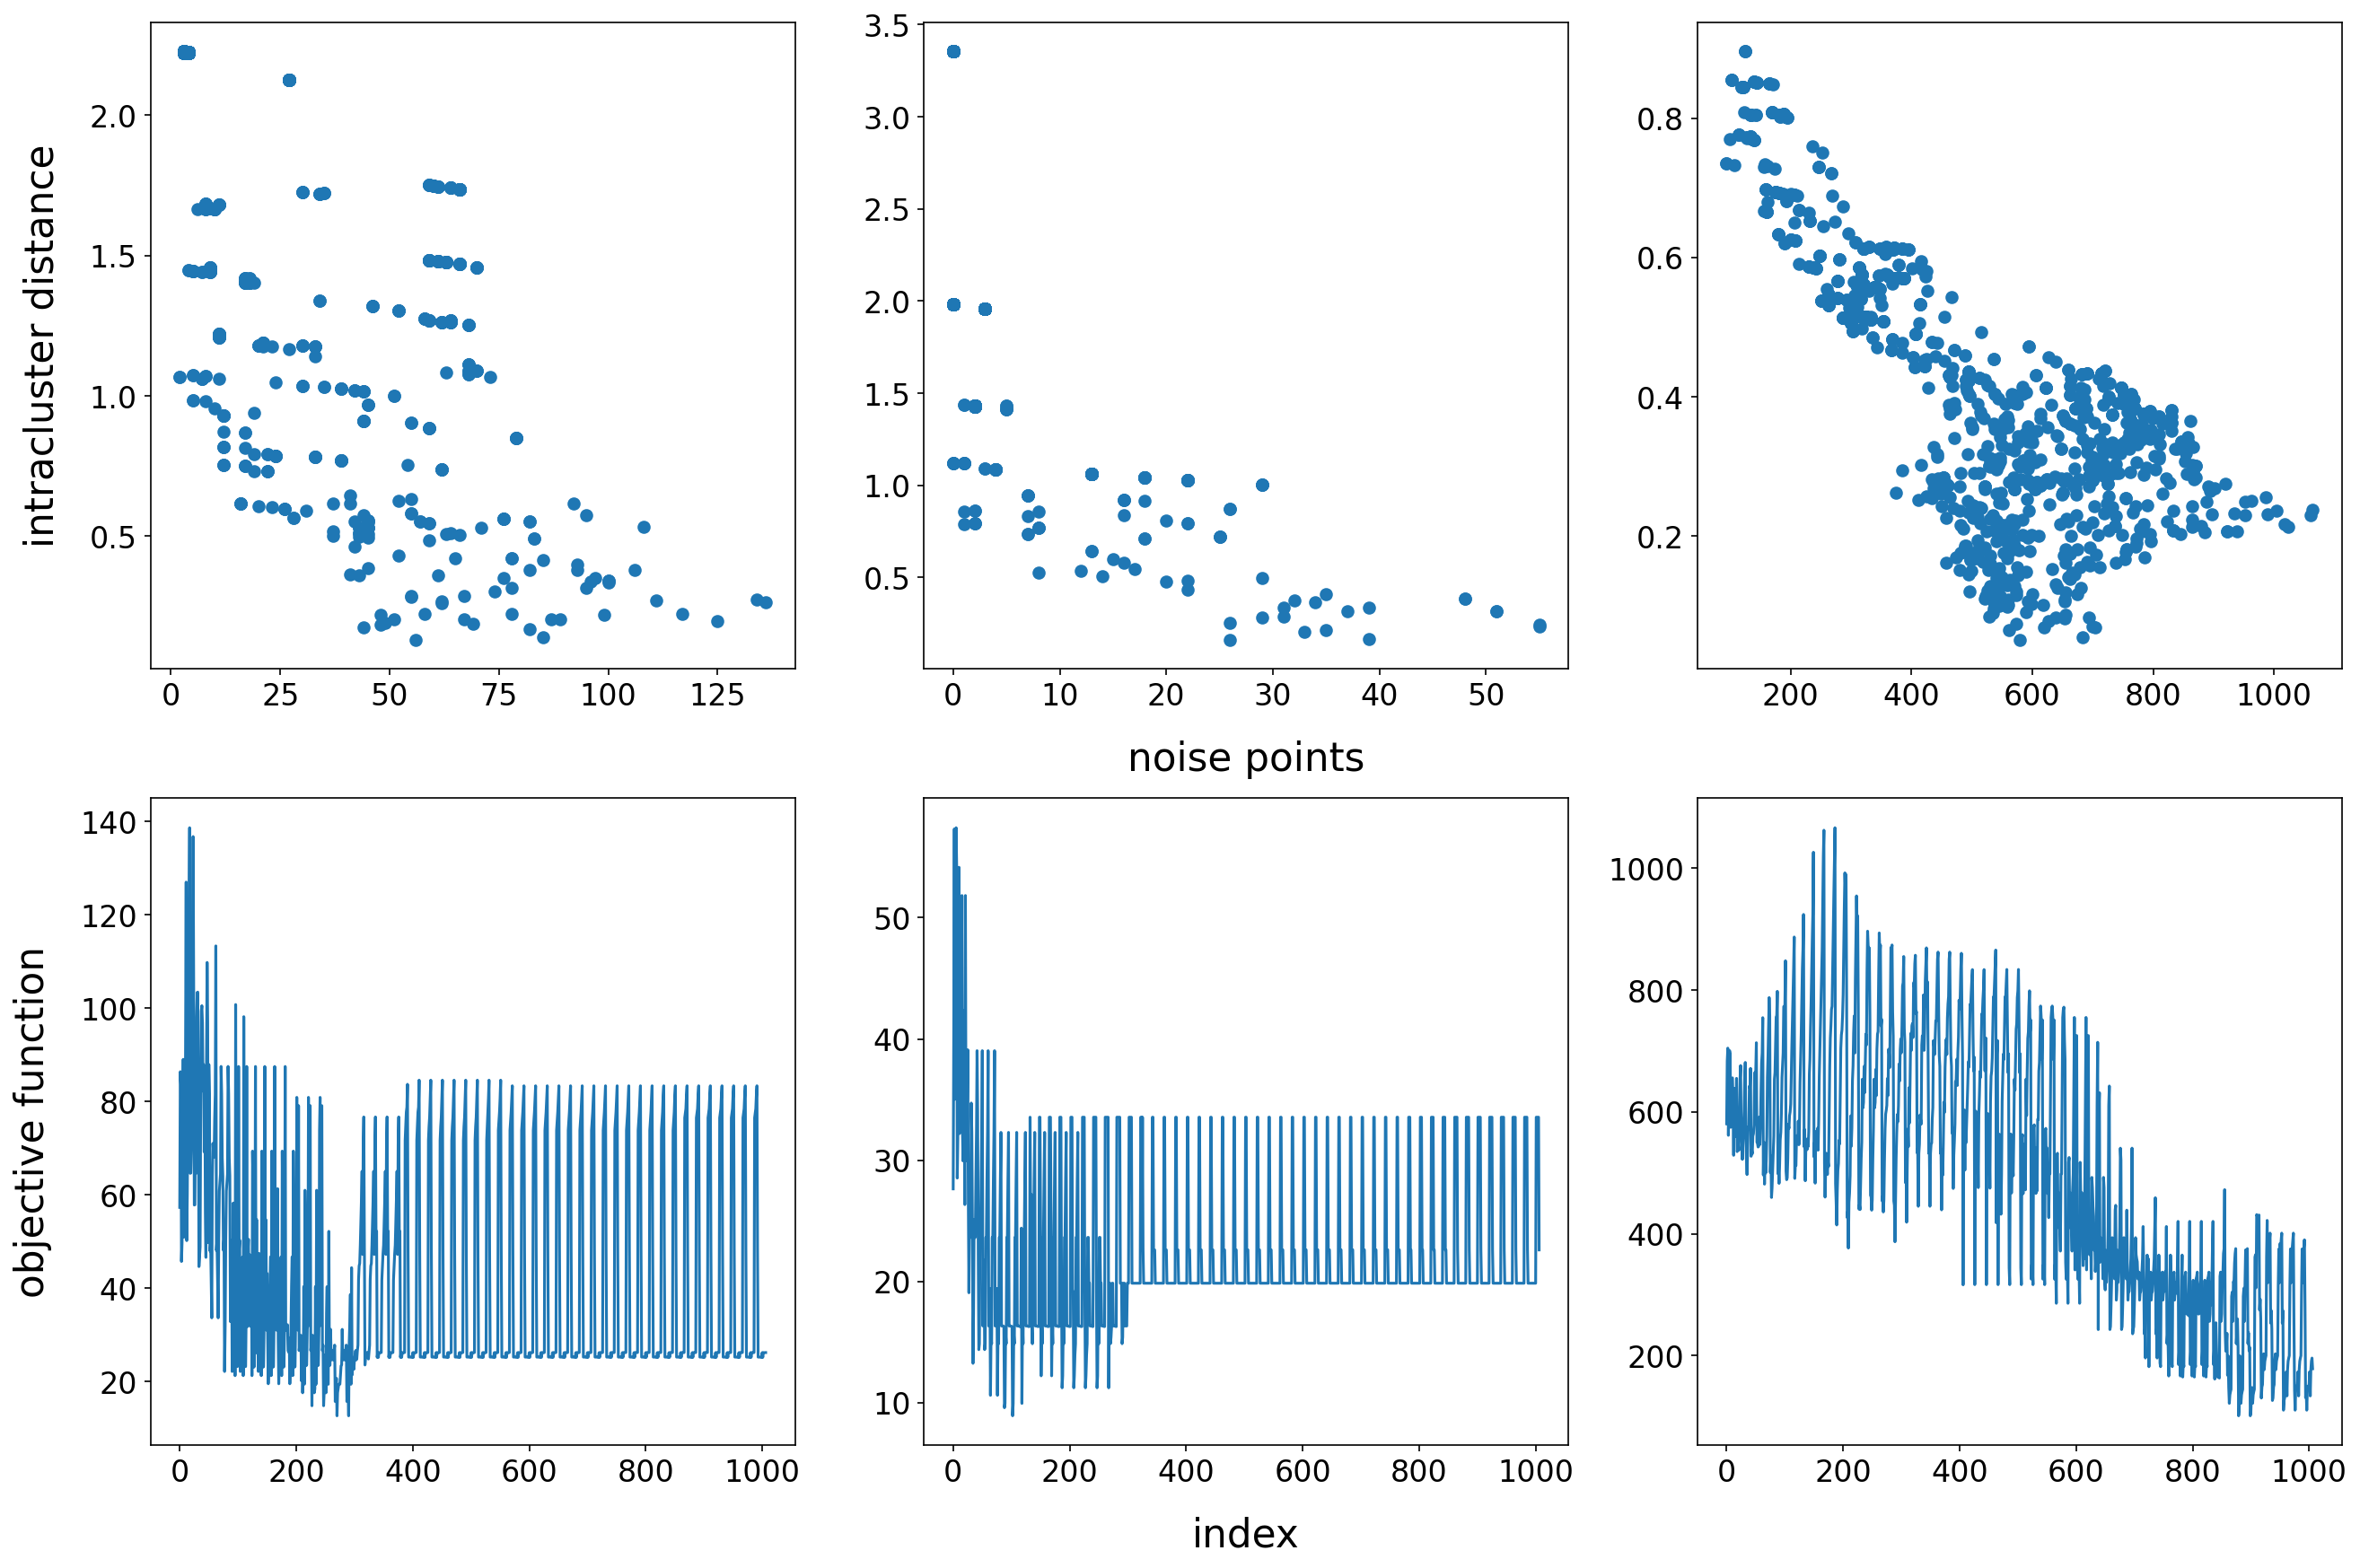

In [58]:
fig, axs = plt.subplots(2, 3, figsize=(21,14), dpi=150)
axs[0][0].scatter(obj_search_bb1['n_noise'], obj_search_bb1['icd'])
axs[0][1].scatter(obj_search_bb2['n_noise'], obj_search_bb2['icd'])
axs[0][2].scatter(obj_search_bb3['n_noise'], obj_search_bb3['icd'])
axs[0][1].set_xlabel('noise points', fontsize=21, labelpad=15)
axs[0][0].set_ylabel('intracluster distance', fontsize=21, labelpad=15)
axs[0][0].tick_params(labelsize=16)
axs[0][1].tick_params(labelsize=16)
axs[0][2].tick_params(labelsize=16)

axs[1][0].plot(obj(obj_search_bb1))
axs[1][1].plot(obj(obj_search_bb2))
axs[1][2].plot(obj(obj_search_bb3))
axs[1][1].set_xlabel('index', fontsize=21, labelpad=15)
axs[1][0].set_ylabel('objective function', fontsize=21, labelpad=15)
axs[1][0].tick_params(labelsize=16)
axs[1][1].tick_params(labelsize=16)
axs[1][2].tick_params(labelsize=16)
#fig.savefig('SI_fig_10.png')
plt.show()

#### View interactive plots with compound structures (mouse-over point)

In [24]:
#plot_hdbscan_interactive(bb1_pbind, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pbind, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pbind, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

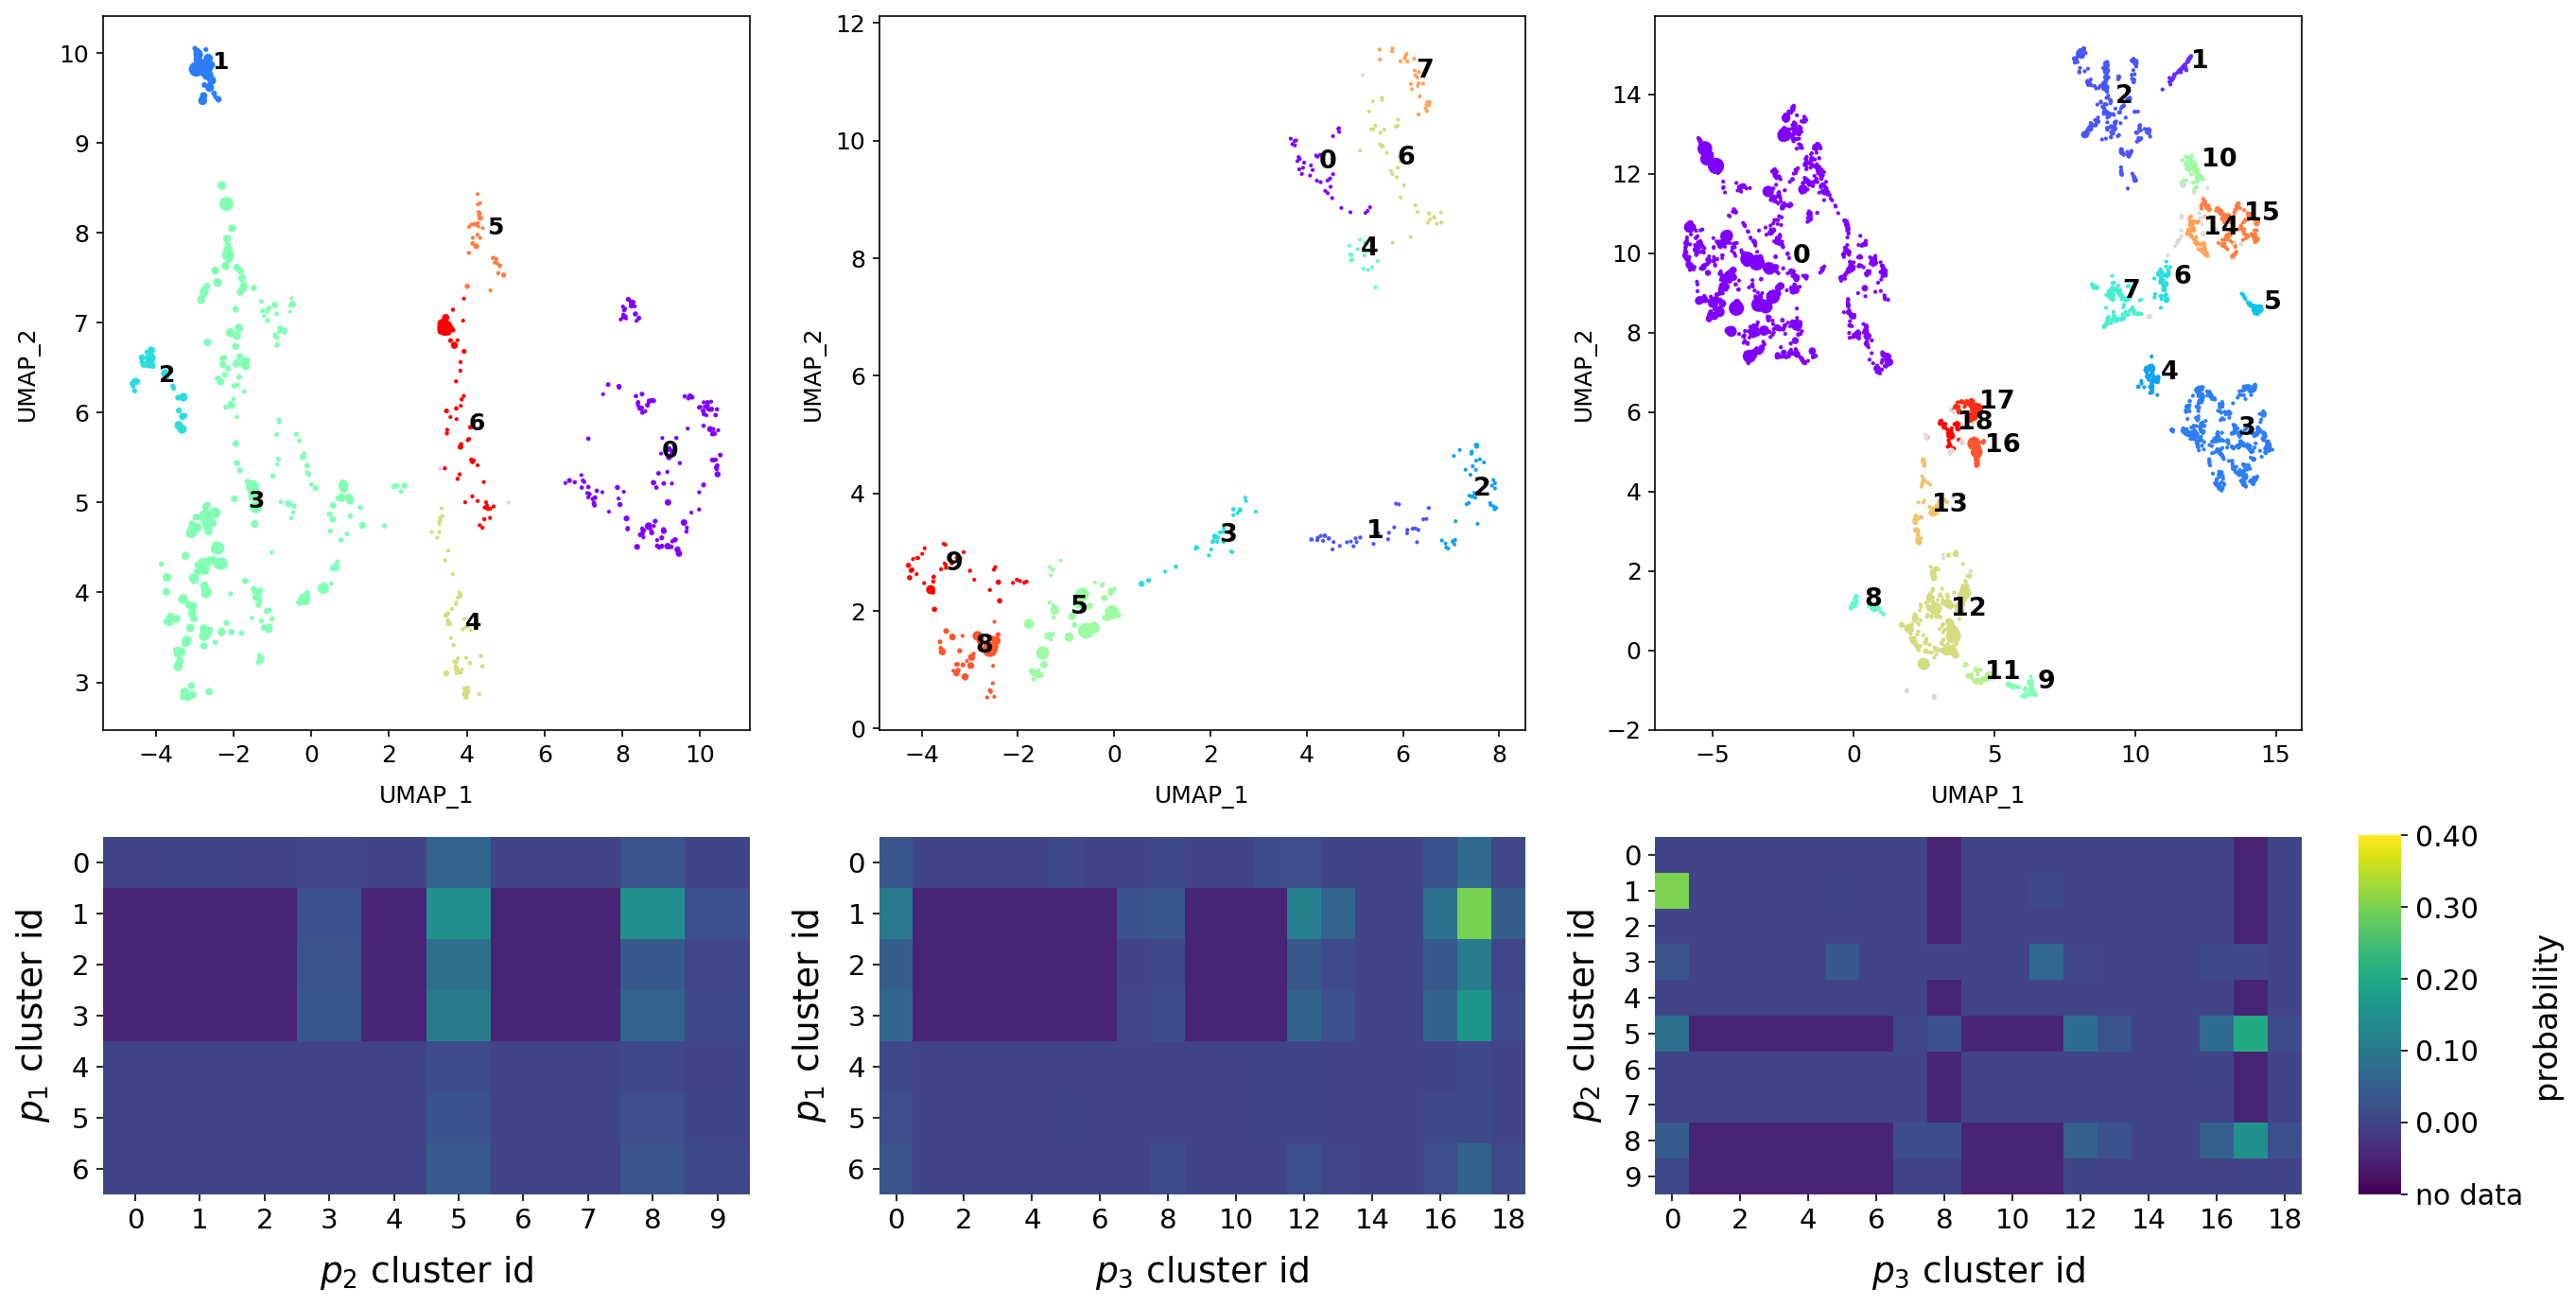

In [59]:
p_12, p_13, p_23 = plot_cluster_combos(total_compounds, bb1_pbind, bb2_pbind, bb3_pbind, trans_bb1, trans_bb2, trans_bb3)

In [60]:
#array_to_latex.to_ltx(p_12, frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(p_13[:, :10], frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(p_13[:, 10:], frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(p_23[:, :10], frmt='{:.4f}', arraytype='tabular')
#array_to_latex.to_ltx(p_23[:, 10:], frmt='{:.4f}', arraytype='tabular')

### Distribution of P(bind) values and building blocks in each cluster

In [61]:
bb1_cluster, bb1_data = cluster_rep(bb1_pbind, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pbind, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pbind, bb_pos='bb3')

In [62]:
bb1_random = gen_random_cluster(bb1_pbind)
bb2_random = gen_random_cluster(bb2_pbind)
bb3_random = gen_random_cluster(bb3_pbind)

In [63]:
## Calculate FWHM for bbs with P(bind) > 0
bb1_bind = bb1_pbind.loc[bb1_pbind['P(bind)'] > 0].reset_index()
bb1_fwhm = pd.DataFrame(calc_fwhm(bb1_bind).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb2_bind = bb2_pbind.loc[bb2_pbind['P(bind)'] > 0].reset_index()
bb2_fwhm = pd.DataFrame(calc_fwhm(bb2_bind).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb3_bind = bb3_pbind.loc[bb3_pbind['P(bind)'] > 0].reset_index()
bb3_fwhm = pd.DataFrame(calc_fwhm(bb3_bind).items(), columns=['Cluster', 'FWHM']).assign(random=False)

In [64]:
bb1_t, bb1_rand_fwhm = fwhm_ttest(bb1_bind, bb1_fwhm, N=50)
print(bb1_t)
bb2_t, bb2_rand_fwhm = fwhm_ttest(bb2_bind, bb2_fwhm, N=50)
print(bb2_t)
bb3_t, bb3_rand_fwhm = fwhm_ttest(bb3_bind, bb3_fwhm, N=50)
print(bb3_t)

Ttest_indResult(statistic=-0.3551511914994927, pvalue=0.7286403416683302)
Ttest_indResult(statistic=-2.1939302331248585, pvalue=0.04335349180171926)
Ttest_indResult(statistic=-3.544007154326457, pvalue=0.0011700523873570774)


In [65]:
bb1_FWHM = pd.concat([bb1_fwhm, bb1_rand_fwhm])
bb2_FWHM = pd.concat([bb2_fwhm, bb2_rand_fwhm])
bb3_FWHM = pd.concat([bb3_fwhm, bb3_rand_fwhm])

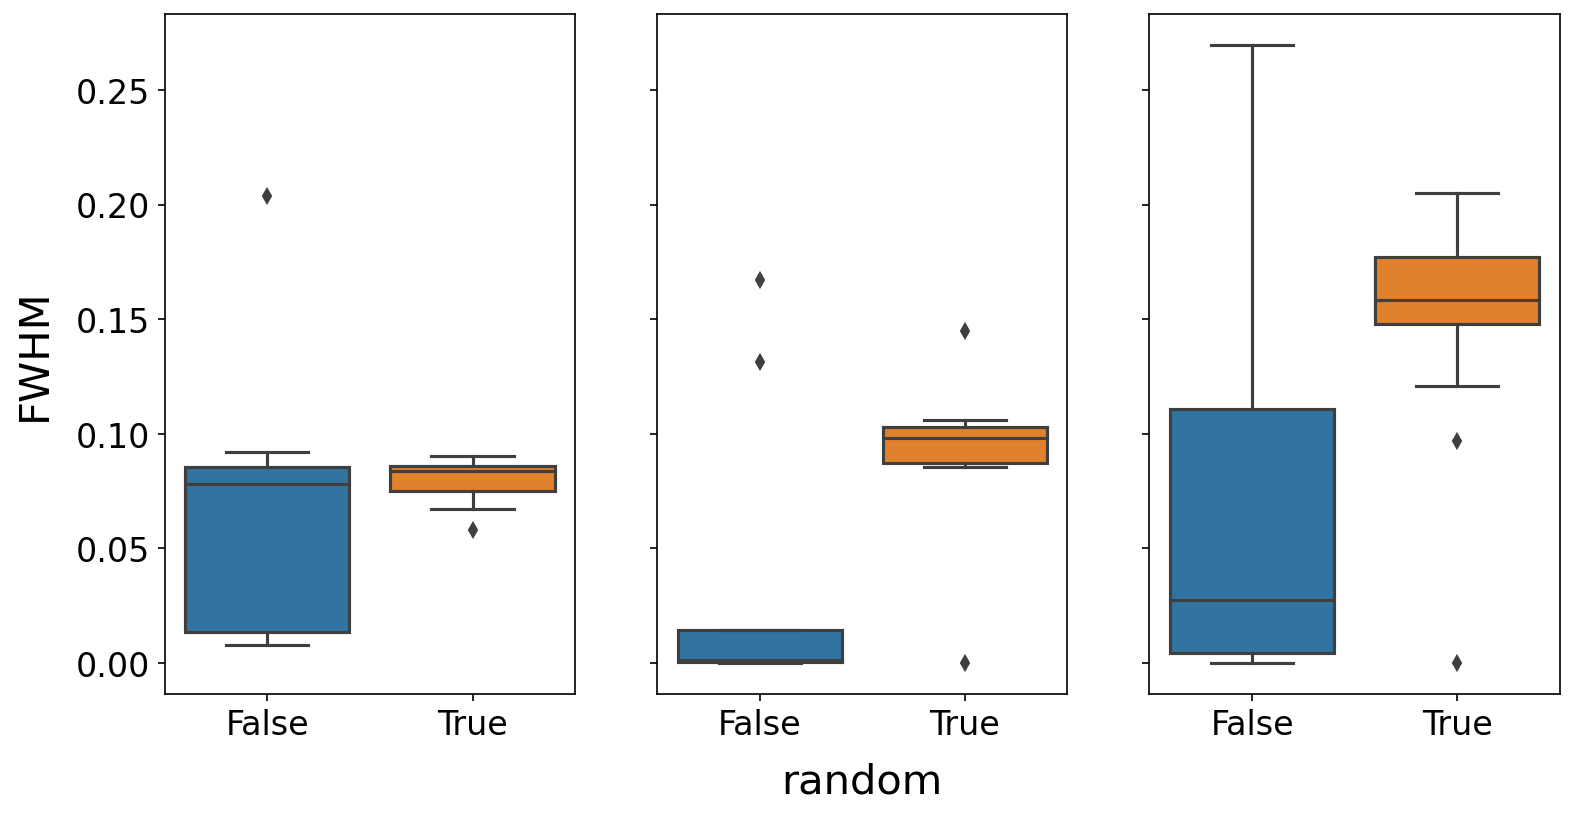

In [66]:
fig, axs = plt.subplots(1, 3, dpi=150, figsize=(12,6), sharey=True)
lfs = 20
tfs = 16
sns.boxplot(x='random', y='FWHM', data=bb1_FWHM, ax=axs[0])
sns.boxplot(x='random', y='FWHM', data=bb2_FWHM, ax=axs[1])
sns.boxplot(x='random', y='FWHM', data=bb3_FWHM, ax=axs[2])
axs[0].set_xlabel("")
axs[0].tick_params(labelsize=tfs)
axs[0].set_ylabel("FWHM", labelpad=10, fontsize=lfs)
axs[1].tick_params(labelsize=tfs)
axs[1].set_xlabel("random", labelpad=10, fontsize=lfs)
axs[1].set_ylabel("")
axs[2].tick_params(labelsize=tfs)
axs[2].set_xlabel("")
axs[2].set_ylabel("")
plt.show()
#fig.savefig('SI_figure_5.png')

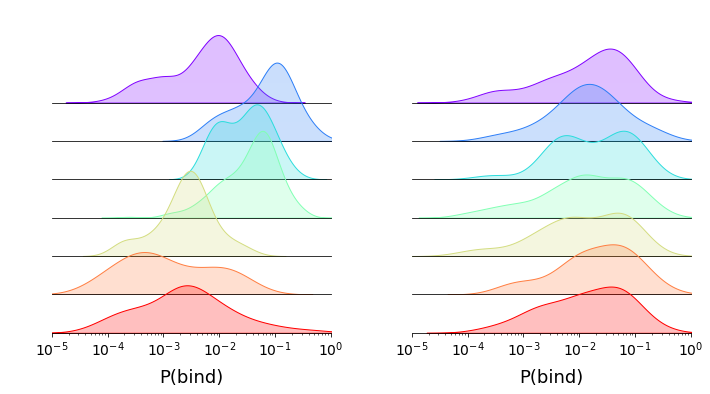

In [67]:
plot_cluster_pbind(bb1_pbind, bb1_random)

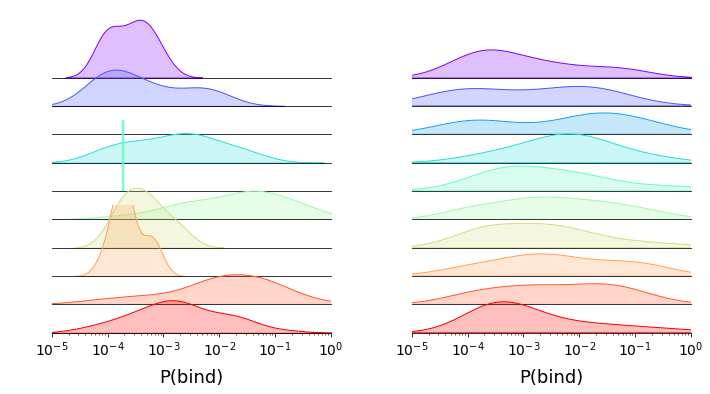

In [68]:
plot_cluster_pbind(bb2_pbind, bb2_random)

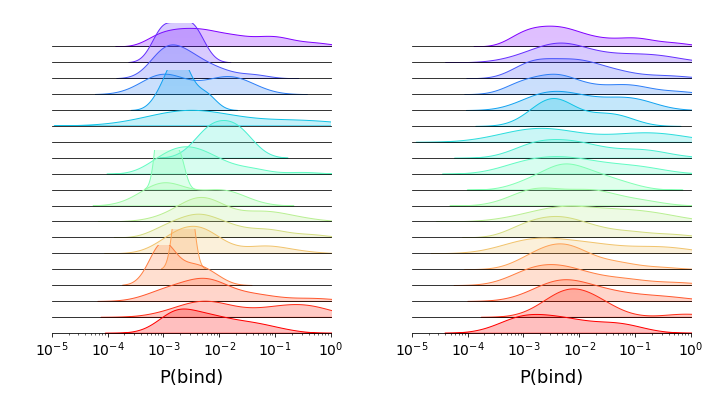

In [69]:
plot_cluster_pbind(bb3_pbind, bb3_random)

In [70]:
auc_75_3D = pd.read_csv('auc_75_3D.csv').assign(frac=0.75)
auc_90_3D = pd.read_csv('auc_90_3D.csv').assign(frac=0.90)
auc_95_3D = pd.read_csv('auc_95_3D.csv').assign(frac=0.95)

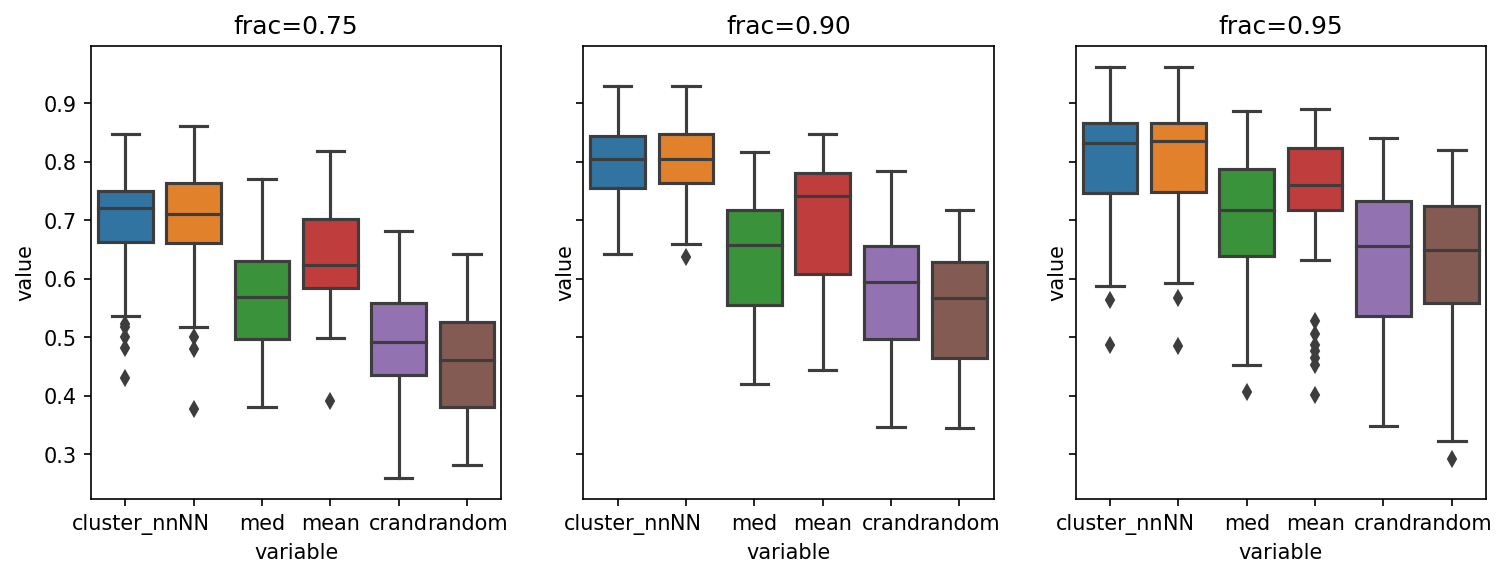

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), dpi=150, sharey=True)
sns.boxplot(x='variable', y='value', data=pd.melt(auc_75_3D, id_vars='frac'), ax=axs[0])
sns.boxplot(x='variable', y='value', data=pd.melt(auc_90_3D, id_vars='frac'), ax=axs[1])
sns.boxplot(x='variable', y='value', data=pd.melt(auc_95_3D, id_vars='frac'), ax=axs[2])
axs[0].set_title('frac=0.75')
axs[1].set_title('frac=0.90')
axs[2].set_title('frac=0.95')
plt.show()

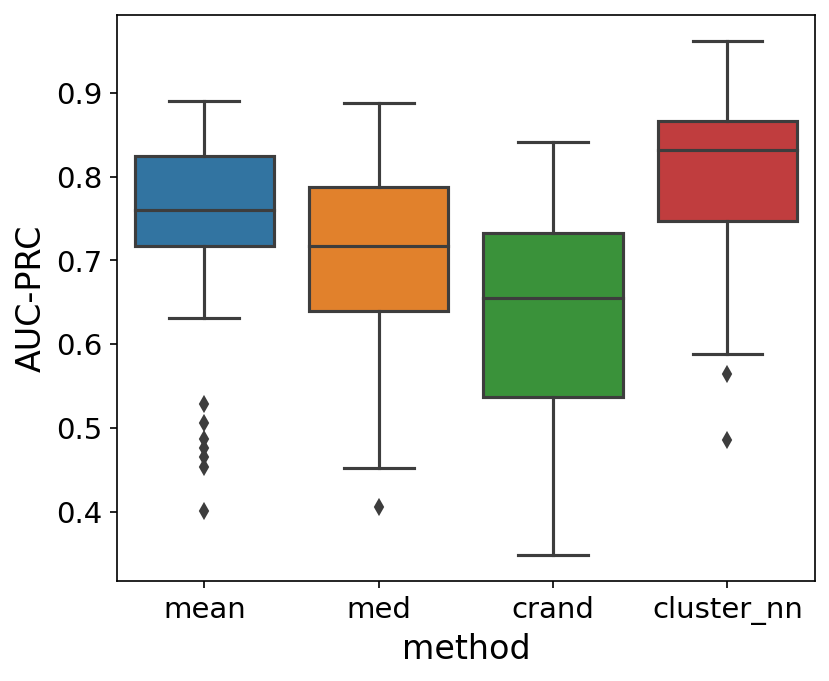

In [72]:
sel = auc_95_3D[['mean', 'med', 'crand', 'cluster_nn', 'frac']]
fig, axs = plt.subplots(figsize=(6,5), dpi=150)
sns.boxplot(x='variable', y='value', data=pd.melt(sel, id_vars='frac'), ax=axs)
axs.tick_params(labelsize=14)
axs.set_xlabel('method', fontsize=16)
axs.set_ylabel('AUC-PRC', fontsize=16)
#fig.savefig('SI_figure_6.png')
plt.show()

In [73]:
concat_auc = pd.concat([auc_75_3D, auc_90_3D, auc_95_3D])
total_auc = pd.melt(concat_auc, id_vars='frac')

### Get read count thresholds

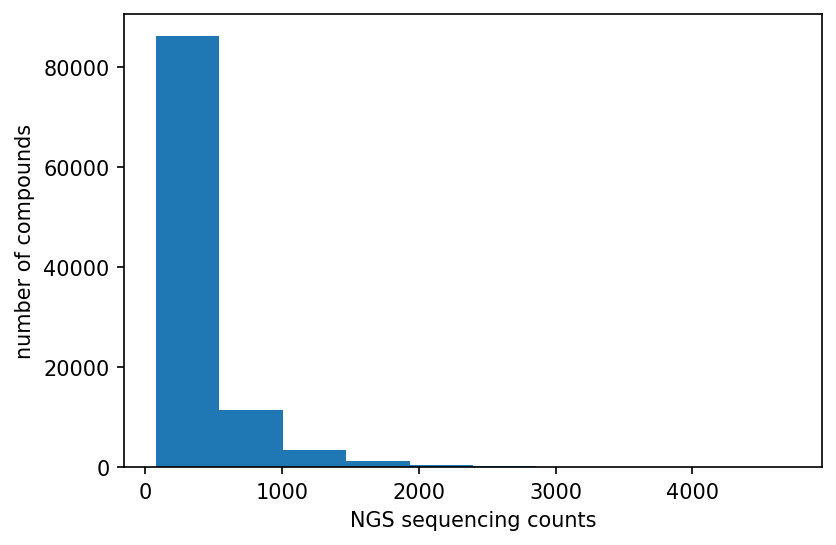

In [74]:
fig, axs = plt.subplots(figsize=(6,4), dpi=150)

axs.hist(total_compounds.loc[total_compounds['read_count'] > 0]['read_count'])
axs.set_xlabel('NGS sequencing counts')
axs.set_ylabel('number of compounds')
#fig.savefig('SI_figure_8.png')
plt.show()

In [75]:
# Create table of split of binders/non-binders for different read count thresholds
thresholds = [1, 50, 100, 500, 1000]
val = np.zeros((len(thresholds), 3))
for i, thresh in enumerate(thresholds):
    val[i, 0] = thresh
    val[i, 1] = np.mean(total_compounds['read_count'] > thresh)
    val[i, 2] = 1 - val[i, 1] 

In [76]:
array_to_latex.to_ltx(val, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  1.0000 &  0.0233 &  0.9767\\
  50.0000 &  0.0233 &  0.9767\\
  100.0000 &  0.0198 &  0.9802\\
  500.0000 &  0.0043 &  0.9957\\
  1000.0000 &  0.0013 &  0.9987
\end{tabular}


### Permutated building blocks

In [80]:
bb1_counts = total_compounds.groupby(['bb1'], as_index=False)['structure'].count()
bb2_counts = total_compounds.groupby(['bb2'], as_index=False)['structure'].count()
bb3_counts = total_compounds.groupby(['bb3'], as_index=False)['structure'].count()

In [81]:
bb1_info = pd.merge(bb1_pbind, bb1_counts, on='bb1').sort_values(by='structure').reset_index()
bb2_info = pd.merge(bb2_pbind, bb2_counts, on='bb2').sort_values(by='structure').reset_index()
bb3_info = pd.merge(bb3_pbind, bb3_counts, on='bb3').sort_values(by='structure').reset_index()

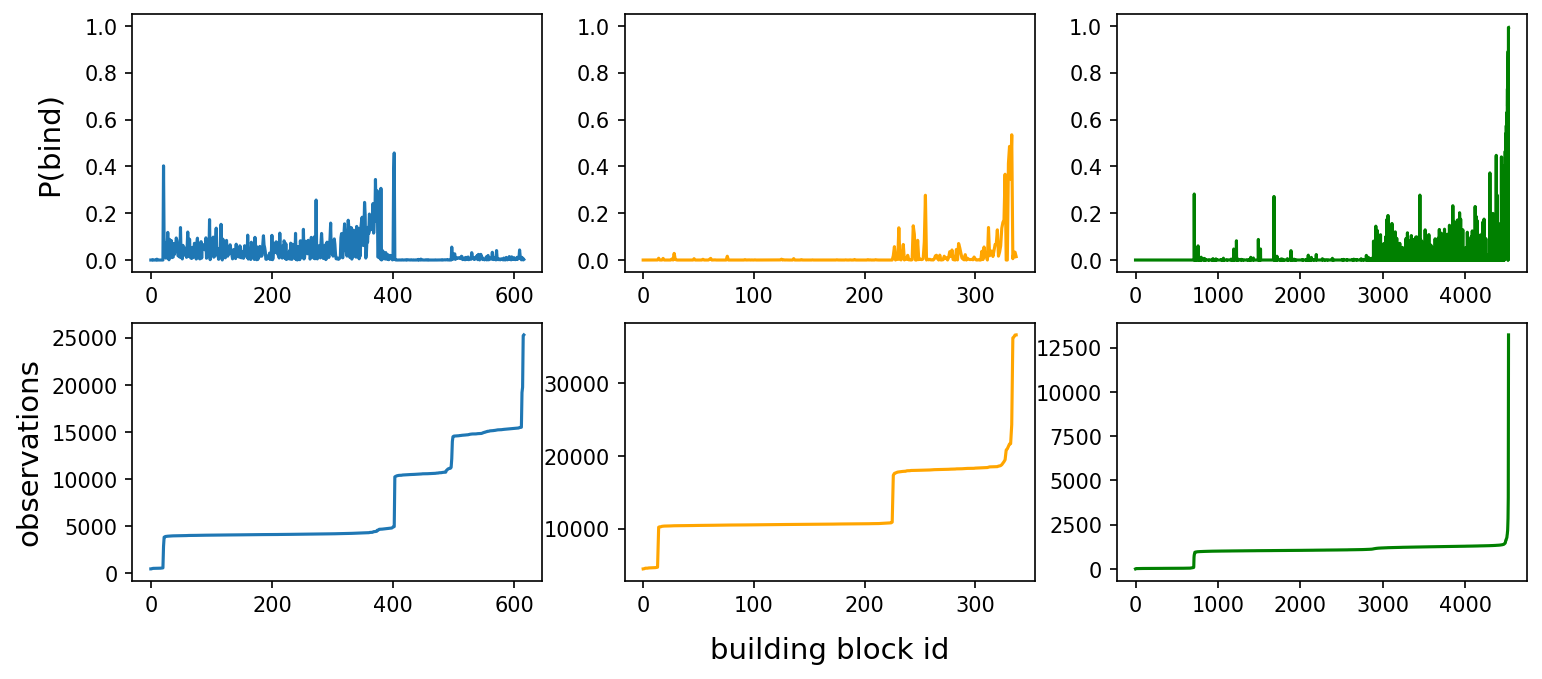

In [82]:
fig, axs = plt.subplots(2, 3, figsize=(12,5), dpi=150)
axs[0][0].plot(bb1_info['P(bind)'])
axs[0][0].set_ylabel('P(bind)', fontsize=14, labelpad=10)
axs[0][0].set_ylim([-0.05, 1.05])

axs[1][0].plot(bb1_info['structure'])
axs[1][0].set_ylabel('observations', fontsize=14)

axs[0][1].plot(bb2_info['P(bind)'], color='orange')
axs[0][1].set_ylabel('')
axs[0][1].set_ylim([-0.05, 1.05])

axs[1][1].plot(bb2_info['structure'], color='orange')
axs[1][1].set_xlabel('building block id', labelpad=10, fontsize=14)

axs[0][2].plot(bb3_info['P(bind)'], color='green')
axs[0][2].set_ylabel('')
axs[0][2].set_ylim([-0.05, 1.05])

axs[1][2].plot(bb3_info['structure'], color='green')

#fig.savefig('SI_figure_1.png')
plt.show()

### Calculate sample physicochemical properties (PCP)

In [89]:
bb1_data['molecules'] = make_molecules(bb1_data)
bb2_data['molecules'] = make_molecules(bb2_data)
bb3_data['molecules'] = make_molecules(bb3_data)

In [100]:
bb1_data = calc_PCP(bb1_data)
bb2_data = calc_PCP(bb2_data)
bb3_data = calc_PCP(bb3_data)

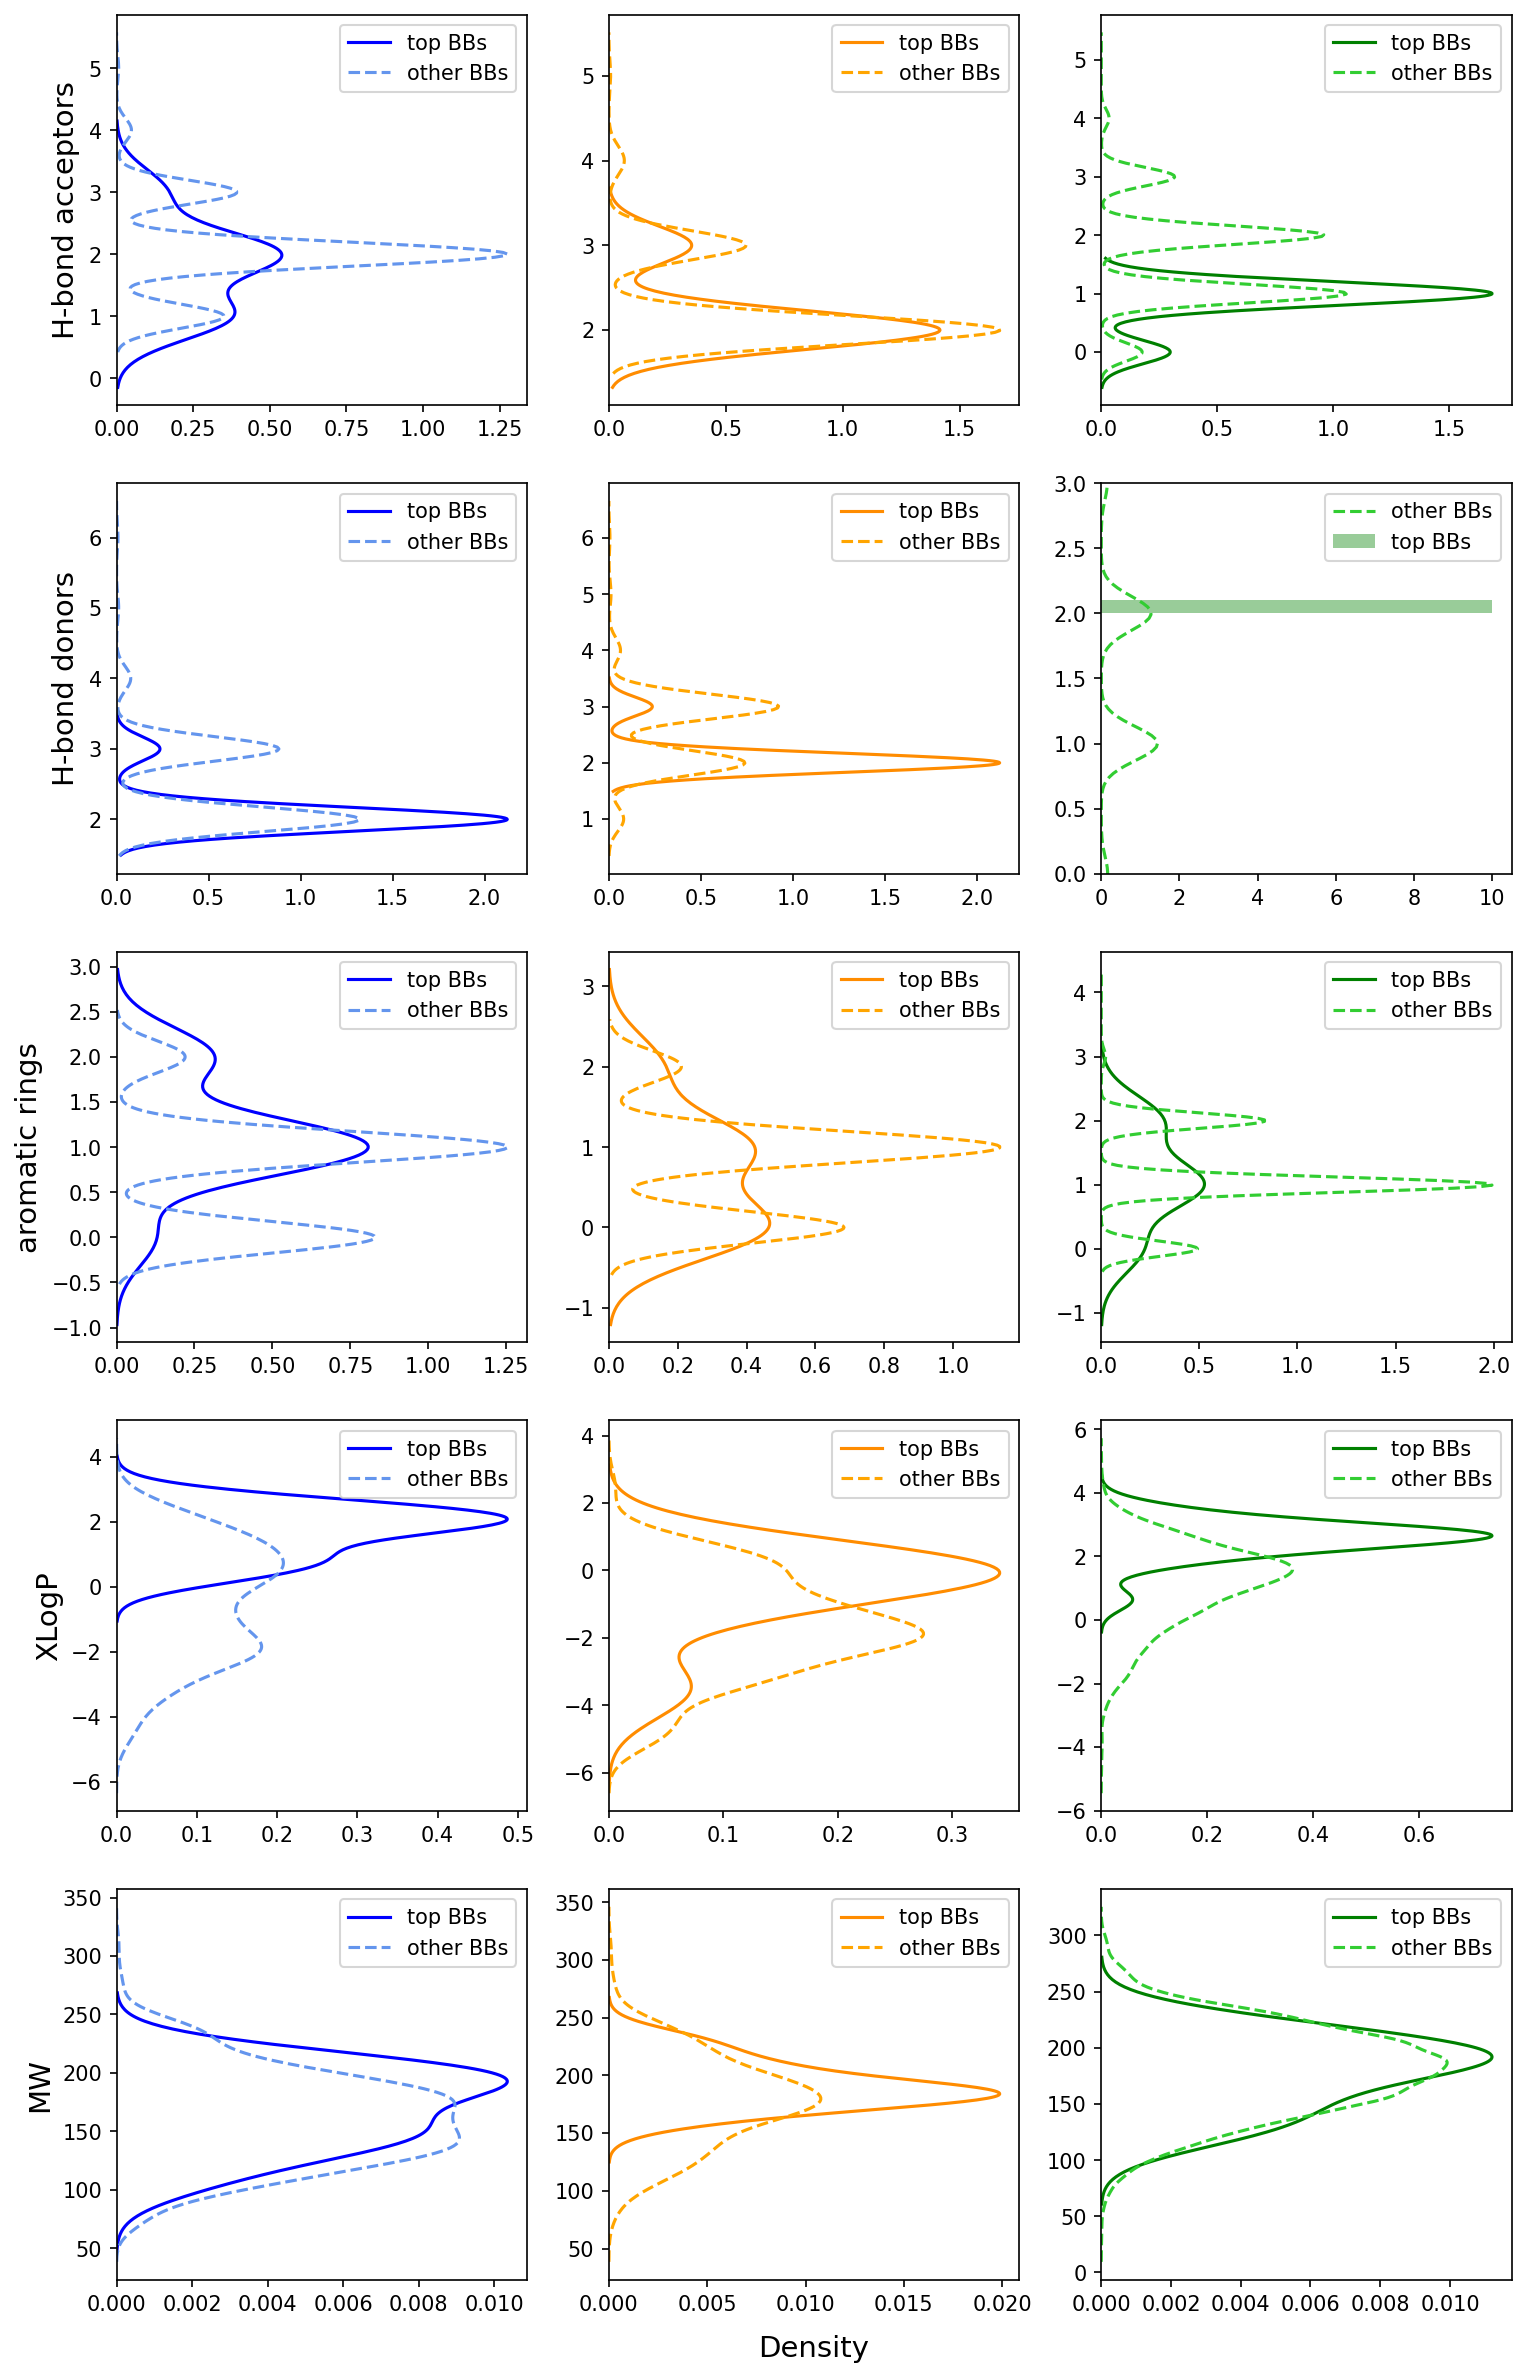

In [101]:
fig, axs = plt.subplots(5, 3, figsize=(12,20), dpi=150)

bb1_top_ind = list(np.argsort(bb1_data['P(bind)'])[::-1][:20])
bb1_rest_ind = list(np.argsort(bb1_data['P(bind)'])[::-1][20:])

bb2_top_ind = list(np.argsort(bb2_data['P(bind)'])[::-1][:20])
bb2_rest_ind = list(np.argsort(bb2_data['P(bind)'])[::-1][20:])

bb3_top_ind = list(np.argsort(bb3_data['P(bind)'])[::-1][:20])
bb3_rest_ind = list(np.argsort(bb3_data['P(bind)'])[::-1][20:])

# hba
sns.kdeplot(y=bb1_data.iloc[bb1_top_ind]['hba'], ax=axs[0][0], color='blue', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb1_data.iloc[bb1_rest_ind]['hba'], ax=axs[0][0], color='cornflowerblue', linestyle='dashed', label='other BBs')
axs[0][0].legend(loc='best')
axs[0][0].set_ylabel('H-bond acceptors', fontsize=14)
axs[0][0].set_xlabel('')

sns.kdeplot(y=bb2_data.iloc[bb2_top_ind]['hba'], ax=axs[0][1], color='darkorange', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb2_data.iloc[bb2_rest_ind]['hba'], ax=axs[0][1], color='orange', linestyle='dashed', label='other BBs')
axs[0][1].legend(loc='best')
axs[0][1].set_ylabel('')
axs[0][1].set_xlabel('')
#axs[0][1].set_xlabel('Density', labelpad=10, fontsize=14)

sns.kdeplot(y=bb3_data.iloc[bb3_top_ind]['hba'], ax=axs[0][2], color='green', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb3_data.iloc[bb3_rest_ind]['hba'], ax=axs[0][2], color='limegreen', linestyle='dashed', label='other BBs')
axs[0][2].legend(loc='best')
axs[0][2].set_ylabel('')
axs[0][2].set_xlabel('')

# hbd
sns.kdeplot(y=bb1_data.iloc[bb1_top_ind]['hbd'], ax=axs[1][0], color='blue', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb1_data.iloc[bb1_rest_ind]['hbd'], ax=axs[1][0], color='cornflowerblue', linestyle='dashed', label='other BBs')
axs[1][0].legend(loc='best')
axs[1][0].set_ylabel('H-bond donors', fontsize=14)
axs[1][0].set_xlabel('')

sns.kdeplot(y=bb2_data.iloc[bb2_top_ind]['hbd'], ax=axs[1][1], color='darkorange', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb2_data.iloc[bb2_rest_ind]['hbd'], ax=axs[1][1], color='orange', linestyle='dashed', label='other BBs')
axs[1][1].legend(loc='best')
axs[1][1].set_ylabel('')
axs[1][1].set_xlabel('')
#axs[1][1].set_xlabel('Density', labelpad=10, fontsize=14)

axs[1][2].hist(bb3_data.iloc[bb3_top_ind]['hbd'], color='green', alpha=0.4, orientation='horizontal', density=True, rwidth=3, label='top BBs')
sns.kdeplot(y=bb3_data.iloc[bb3_rest_ind]['hbd'], ax=axs[1][2], color='limegreen', linestyle='dashed', label='other BBs')
axs[1][2].set_ylim([0, 3])
axs[1][2].legend(loc='best')
axs[1][2].set_ylabel('')
axs[1][2].set_xlabel('')

# aromatic rings
sns.kdeplot(y=bb1_data.iloc[bb1_top_ind]['aromatic_rings'], ax=axs[2][0], color='blue', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb1_data.iloc[bb1_rest_ind]['aromatic_rings'], ax=axs[2][0], color='cornflowerblue', linestyle='dashed', label='other BBs')
axs[2][0].legend(loc='best')
axs[2][0].set_ylabel('aromatic rings', fontsize=14)
axs[2][0].set_xlabel('')

sns.kdeplot(y=bb2_data.iloc[bb2_top_ind]['aromatic_rings'], ax=axs[2][1], color='darkorange', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb2_data.iloc[bb2_rest_ind]['aromatic_rings'], ax=axs[2][1], color='orange', linestyle='dashed', label='other BBs')
axs[2][1].legend(loc='best')
axs[2][1].set_ylabel('')
axs[2][1].set_xlabel('')
#axs[2][1].set_xlabel('Density', labelpad=10, fontsize=14)

sns.kdeplot(y=bb3_data.iloc[bb3_top_ind]['aromatic_rings'], ax=axs[2][2], color='green', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb3_data.iloc[bb3_rest_ind]['aromatic_rings'], ax=axs[2][2], color='limegreen', linestyle='dashed', label='other BBs')
axs[2][2].legend(loc='best')
axs[2][2].set_ylabel('')
axs[2][2].set_xlabel('')

# XLogP
sns.kdeplot(y=bb1_data.iloc[bb1_top_ind]['xlogp'], ax=axs[3][0], color='blue', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb1_data.iloc[bb1_rest_ind]['xlogp'], ax=axs[3][0], color='cornflowerblue', linestyle='dashed', label='other BBs')
axs[3][0].legend(loc='best')
axs[3][0].set_ylabel('XLogP', fontsize=14)
axs[3][0].set_xlabel('')

sns.kdeplot(y=bb2_data.iloc[bb2_top_ind]['xlogp'], ax=axs[3][1], color='darkorange', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb2_data.iloc[bb2_rest_ind]['xlogp'], ax=axs[3][1], color='orange', linestyle='dashed', label='other BBs')
axs[3][1].legend(loc='best')
axs[3][1].set_ylabel('')
axs[3][1].set_xlabel('')
#axs[3][1].set_xlabel('Density', labelpad=10, fontsize=14)

sns.kdeplot(y=bb3_data.iloc[bb3_top_ind]['xlogp'], ax=axs[3][2], color='green', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb3_data.iloc[bb3_rest_ind]['xlogp'], ax=axs[3][2], color='limegreen', linestyle='dashed', label='other BBs')
axs[3][2].legend(loc='best')
axs[3][2].set_ylabel('')
axs[3][2].set_xlabel('')

# Molecular Weight
sns.kdeplot(y=bb1_data.iloc[bb1_top_ind]['mw'], ax=axs[4][0], color='blue', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb1_data.iloc[bb1_rest_ind]['mw'], ax=axs[4][0], color='cornflowerblue', linestyle='dashed', label='other BBs')
axs[4][0].legend(loc='best')
axs[4][0].set_ylabel('MW', fontsize=14)
axs[4][0].set_xlabel('')

sns.kdeplot(y=bb2_data.iloc[bb2_top_ind]['mw'], ax=axs[4][1], color='darkorange', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb2_data.iloc[bb2_rest_ind]['mw'], ax=axs[4][1], color='orange', linestyle='dashed', label='other BBs')
axs[4][1].legend(loc='best')
axs[4][1].set_ylabel('')
axs[4][1].set_xlabel('Density', labelpad=10, fontsize=14)

sns.kdeplot(y=bb3_data.iloc[bb3_top_ind]['mw'], ax=axs[4][2], color='green', linestyle='solid', label='top BBs')
sns.kdeplot(y=bb3_data.iloc[bb3_rest_ind]['mw'], ax=axs[4][2], color='limegreen', linestyle='dashed', label='other BBs')
axs[4][2].legend(loc='best')
axs[4][2].set_ylabel('')
axs[4][2].set_xlabel('')

#fig.savefig('SI_figure_3.png')
plt.show()